# Visualizing Datatypes: Images (raster & vector), Tabular data

1. Quick intro to jupyter notebooks/labs (review from HW)
   1. How to have "real time" access to these notebooks
   1. Jupyter notebooks as "python calculators"
   1. Markdown in Jupyter -- a quick intro
1. Images
   1. Raster images: Quantifying the badness of Stitch with math!
   1. RGB decomposition of images
1. Tabular data (we probably won't get to this until Week 03)
   1. EXTRA: with Python's `csv` library
   1. with Pandas (https://pandas.pydata.org/)
   1. EXTRA: with NumPy (https://numpy.org/) (probably not time though... maybe next time?)
   
Note: items labeled with an "EXTRA" means that we are unlikely to get to them in class, but they are here as additional info for you!


## 1. Quick intro to notebooks

### 1.A How to access this in "real time"

At the top of each notebook you'll see something like:

To access this in near-real time try: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2024/blob/master/week02/inClass_week02.ipynb

Or paste this URL into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html


I will be running a script that auto-pushes to the github every ~15 seconds in case you get behind in the coding (I will try to go at a reasonable speed!)

**NOTE:** You can access notebooks using the "ungraded" lab spaces under each week on PrairieLearn or you can install stuff locally if you are comfortable doing so.

### 1.B Jupyter notebooks as calculators

A lot of this is re-hash from the homework, but you can use notebooks to do simple calculations:

In [1]:
2 + 3

5

Note in the above there is an "input" number [1] for your input and then an "output" [1] showing what the input [1] produces.

Note I can press the "run" button OR a hotkey of `SHIFT+RETURN` will run the code cell for you.

### 1.C Markdown in Jupyter -- A quick intro

What is nice about these notebooks is you can do a few things, like for example write notes in Markdown which is an intuative way to create HTML-like text. For example:

I can write stuff like normal.

# I can make a big header
## I can make a slightly smaller header
### Even smaller
#### I think this is the dingiest one we can get

I can also make an ordered list:

1. thing number 1
1. thing number 2
1. thing number 3

I can also make unordered lists:

* this is an item
* this is another item
* a final item
  * this is a small thing I want to say about the last item

Things we won't really use too much but are still super cool, but sometimes not supported depending on your "flavor" of Jupyter Markdown:

- [X] task 1
- [ ] task 2

I can also specify inline code like `var = 7` or "popped out" code like:

```
var = 7
```

or even specify the type of code (which adds in extra formatting):

```python
var = 7
```

I can also put in formulas with LaTeX -- we won't be doing too much of this, but just some examples for reference include inline math with $\frac{5}{4}$ or "popped out" math with:

$$\frac{5}{4}$$

# 2. Images

Depending on interpretation images can be considered as spatial or field data data (raster images), or tree/hierarchical data (vector images).

Let's start this part of the notebook by importing a few things:

In [7]:
import matplotlib
import matplotlib.pyplot as plt

## 1.A Raster images

We'll explore how to manipulate raster images -- where you are given color information at each pixel (x,y) coordinates.

Link to image: https://uiuc-ischool-dataviz.github.io/spring2019online/week01/images/stitch_reworked.png

To mainpulate images, we'll import a function from the `PILLOW` library like last time:

In [8]:
import PIL.Image as Image # this imports *only* the Image function from the PIL module

### FOR LOCAL IMPORTS

Now I'll import my image.  This assumes you have downloaded the image from our class website and have saved it somewhere where you remember the path.  I'm on a Mac, so mine defaults to the downloads folder.

In [9]:
im = Image.open("/Users/jnaiman/Downloads/stitch_reworked.png")

### FOR REMOTE IMPORTS

If we are instead on a remote cloud server (i.e. like PrairieLearn) we can use the `wget` command to get this image instead directly from the URL:

In [1]:
!wget https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/stitch_reworked.png

--2023-08-30 14:18:22--  https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/stitch_reworked.png
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/stitch_reworked.png [following]
--2023-08-30 14:18:23--  https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/stitch_reworked.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9459 (9.2K) [image/png]
Saving to: ‘stitch_reworked.png.1’

stitch_reworked.png 100%[===================>]   9.24K  --.-KB/s    in 0s      

2023-08-30 14:18:25 (19.5 MB/s) - ‘stitch_reworked.png.1’ saved [9459/9459]

This file is then in the same "working directory" as our notebook and we can upload it with:

In [10]:
im = Image.open('stitch_reworked.png')

We can take a quick look at this image inline (i.e. inside this Jupyter notebook) like so:

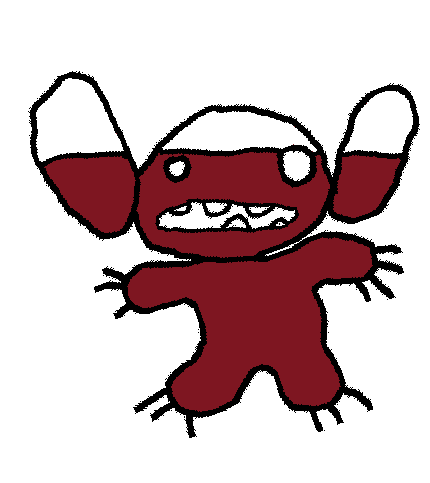

In [11]:
im

What type of object is this?

In [12]:
type(im)

PIL.PngImagePlugin.PngImageFile

Hi Stitch! :D

We can also transform this image into data using NumPy like so:

In [13]:
# lets also import numpy
import numpy as np

In [14]:
im_data = np.array(im)
im_data # I can just put this line right here at the end and it will print out this data "inline" as well

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

We can then check out some features of this dataset.  For example, what is the shape of this dataset?

In [15]:
im_data.shape

(483, 430, 4)

This is a 483x430 image with 4 color channels: (R=Red, G=Green, B=Blue, A=Alpha), where here "Alpha" means opacity.

One represenation of RGB color combinations can be seen in a typical "color wheel":

<img src="https://i.pinimg.com/originals/b7/45/3a/b7453aedcbd060c8b842d85f27c083fb.jpg" width="400px">

What are the unique numbers in this dataset? (i.e. this dataset's values w/o any repeats)

In [8]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

#### ASIDE:
The above lists the unique numbers in this dataset.  If we wanted to check color by color? 

In [9]:
channel_labels = ['R', 'G', 'B', 'A']
for i in range(im_data.shape[2]): # this loops over the last entry of the shape array, so the #4
    print('channel=', channel_labels[i], 
          'unique values=', np.unique( im_data[:,:,i] ) ) # print the unique elements in each channel

channel= R unique values= [  0 126 255]
channel= G unique values= [  0  22 255]
channel= B unique values= [  0  33 255]
channel= A unique values= [  0 255]


This tells us some interesting things!  Unless there are weird combinations, it looks like we have only 3 colors here.  We also only have 2 opacity channels -- either a pixel is opaque (255) or completely invisible (0).

We can double check the uniqe colors by once again apply `np.unique` but using the "axis" argument to tell it what axis to look down.  This is a bit of Python "magic" so feel free to just take my word for it right now, or you can read more details here: https://stackoverflow.com/questions/24780697/numpy-unique-list-of-colors-in-the-image

#### END ASIDE

To see how many unique RGBA combos, we can make use of the `np.unique` function.  Let's try using it the naive way:

In [10]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

We'll, this isn't quite what we want -- we want a list of the RGBA combs, not all the unique numbers in the array as a whole.  To do this, we have to mess with the shape of the array we give `np.unique`:

In [11]:
im_data.shape

(483, 430, 4)

Let's line up this array instead of as x/y pixels as a list of pixels's RGBA colors:

In [12]:
im_data.reshape(-1, im_data.shape[2])

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

Now we can apply `np.unique` to this reshaped array and specify the specifc axis (the first or 0th axis):

In [13]:
np.unique(im_data.reshape(-1, im_data.shape[2]), axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

We can also display this image again, but since we have the data, we can use `matplotlib` to plot -- let's first make a "quick plot" with `matplotlib`:

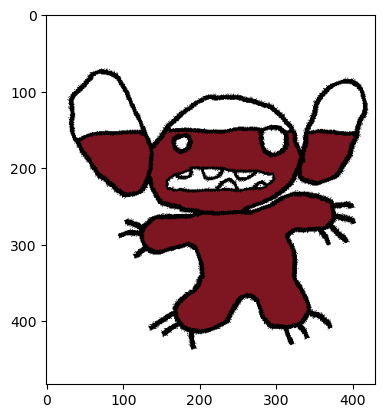

In [14]:
plt.imshow(im_data)

We can tell matplotlib to please just show us the thing without giving us the memory address at the top with:

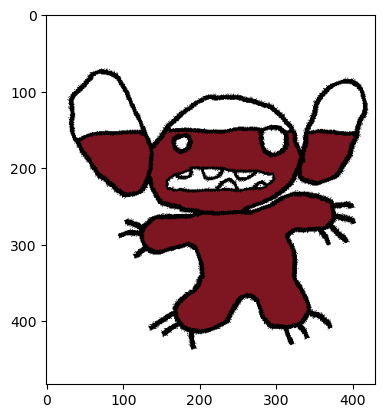

In [15]:
plt.imshow(im_data)
plt.show()

We will end up wanting finer control over how this image looks, which we can do by creating a figure and axis objects.  Before plotting an image, we can see what the "default" of these objects look like with:

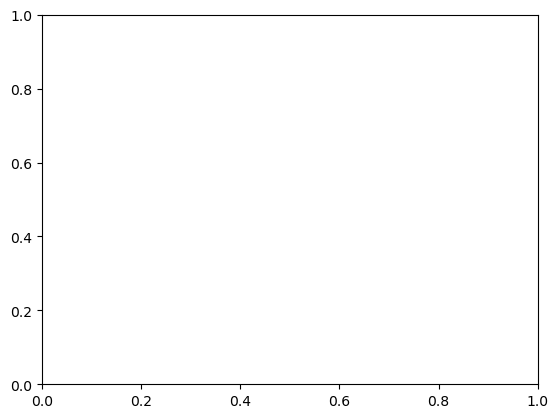

In [16]:
fig, ax = plt.subplots() # generate a "fig" and "ax" object

Here, the "fig" is sort of like the total canvas and the "axis" is everything associated with the box.  `ax` is its own special `matplotlib` object:

In [17]:
ax

We can also change the size of these axis with:

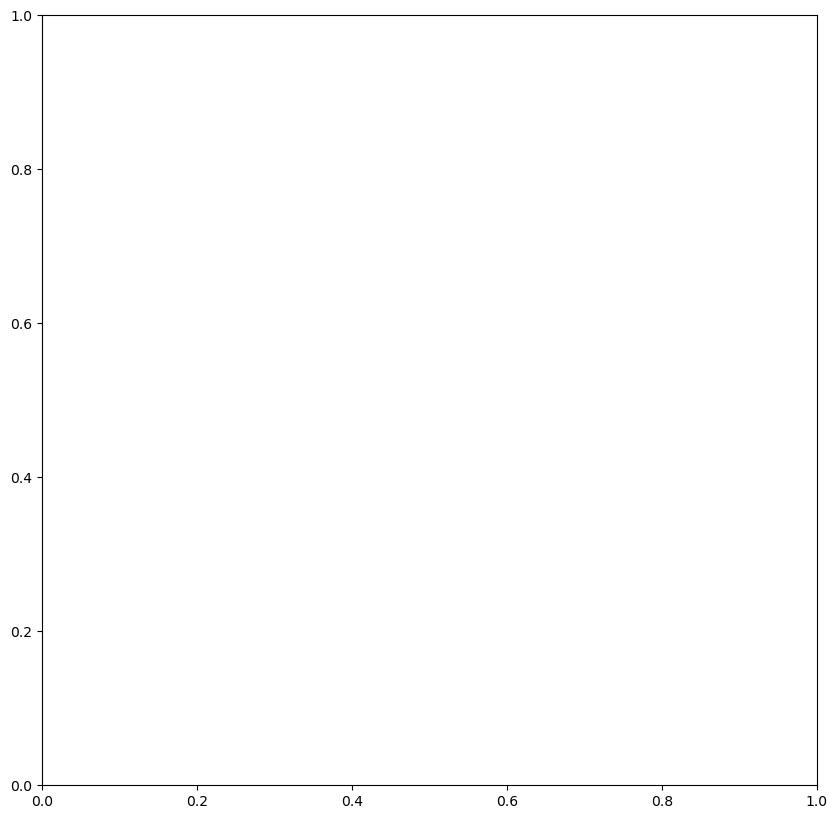

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

Finally, we can add our image to these axis:

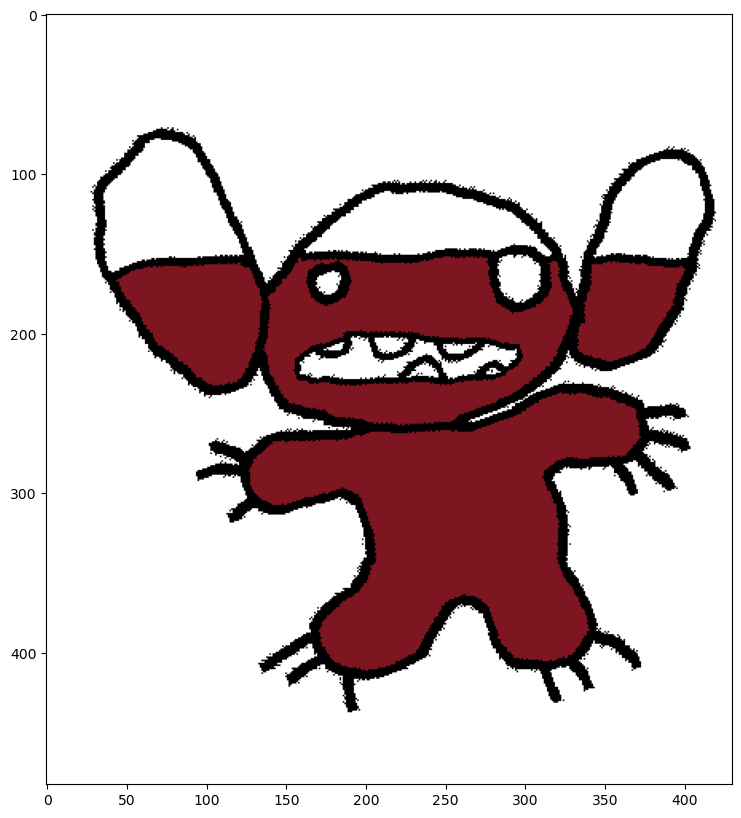

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

ax.imshow(im_data) # use imshow function with "ax" object

plt.show() # this gets rid of the print memory address thing

**NOTE: we might do this section second and 1.B first**

Here, its a bit hard to see that there is white in the interior part of Stitch and then it's transparent outside.  We can modify our plot to show this, by making a gray background.  There are a few ways of doing this, probably the easiest is by setting a gray background:

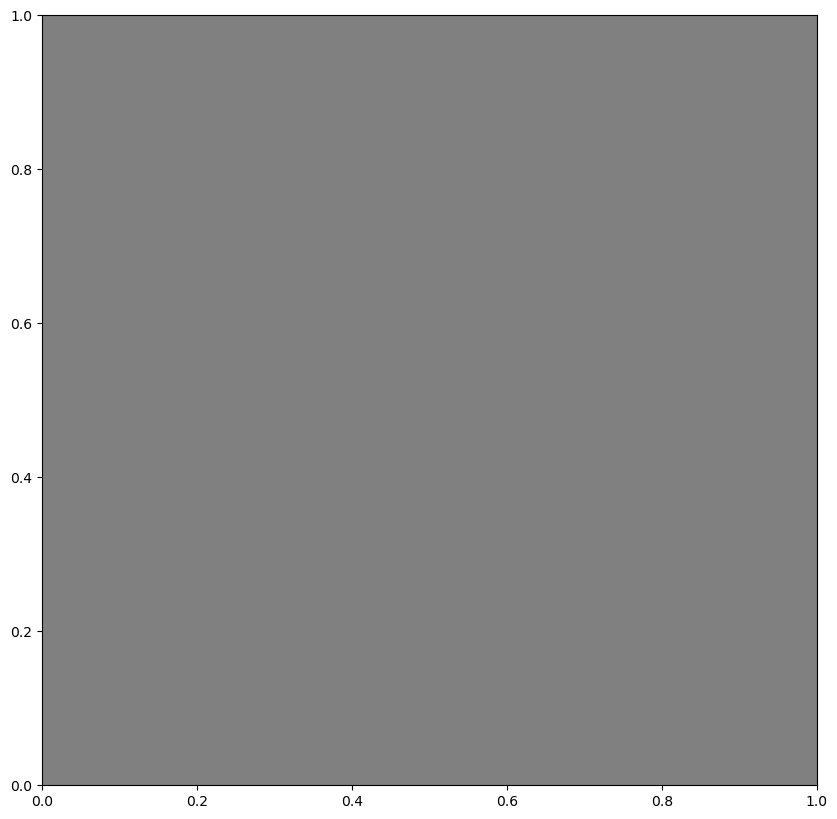

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

ax.set_facecolor('gray') # set background as gray

plt.show()

Now, let's add our stitch image on top:

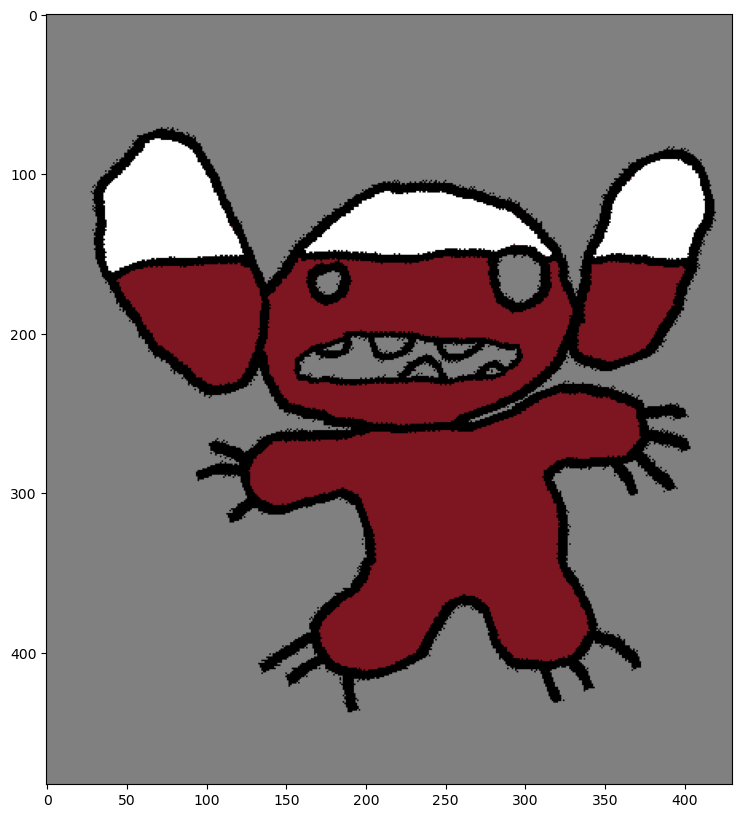

In [21]:
fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

ax.set_facecolor('gray')

ax.imshow(im_data) # then we plot our Stitch image over the top

plt.show() # this gets rid of the print memory address thing

If we recall from the lecture, we talked a bit about how to use this visualization to figure out how to quantify the goodness or badness of Stitch.  Let's play with this idea a bit more now.

Let's start by counting up all the pixels that are "good" in Stitch.  If we see our image above, this is denoted by the white parts of the head an ears.  

**NOTE: this is an example of *filtering* our data!**

In color space, white is denoted by (255, 255, 255, 255) so we will create a filtering "mask" for these values by making sure all color channels have the value of 255.

For example, we can make a boolean mask that only looks for when the R channel, the first in the RGBA channels, is at the maximum value = 255

In [22]:
reds_good_mask = im_data[:,:,0] == 255

In [23]:
reds_good_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Its mostly false because most of the image does NOT have a 255 red channel.  But we can also see which parts of the image are:

In [24]:
im_data[reds_good_mask]

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [25]:
np.unique(im_data[reds_good_mask].reshape(-1, im_data.shape[2]), axis=0)

array([[255, 255, 255, 255]], dtype=uint8)

So, this is, in theory ONLY looking for pixels that have 255 in the red channel, and we are lucky in this case that this is only associated with one color -- the color white.  But, to be sure, we really want to make a check for ALL of the RGBA channels and make a combined mask for all of them.  With boolean masks this looks like:

In [26]:
reds_good_mask = im_data[:,:,0] == 255
greens_good_mask = im_data[:,:,1] == 255
blues_good_mask = im_data[:,:,2] == 255
alphas_good_mask = im_data[:,:,3] == 255

# pixel_mask_good is the combined boolean mask that will check for ALL conditions
pixel_mask_good = reds_good_mask & greens_good_mask & blues_good_mask & alphas_good_mask

Now, using this mask, let's count up the number of "good" pixels.  

We do this by first selecting out only the good pixels:

In [27]:
good_pixels = im_data[pixel_mask_good]

And then we find out the length of this array which is simply the total number of "good" pixels:

In [28]:
ngood = len(good_pixels)
ngood

11929

We can even plot this part of our dataset by creating a masked Stitch image that will just take this "good" part out:

In [29]:
im_data_masked_good = im_data.copy() # first we make a copy of our original dataset to modify
im_data_masked_good[~pixel_mask_good] = 0 # then we set everything that is *NOT* a good pixel to 0 so it will show up gray
# Note here the "~" is the opposite mask of our good pixel mask

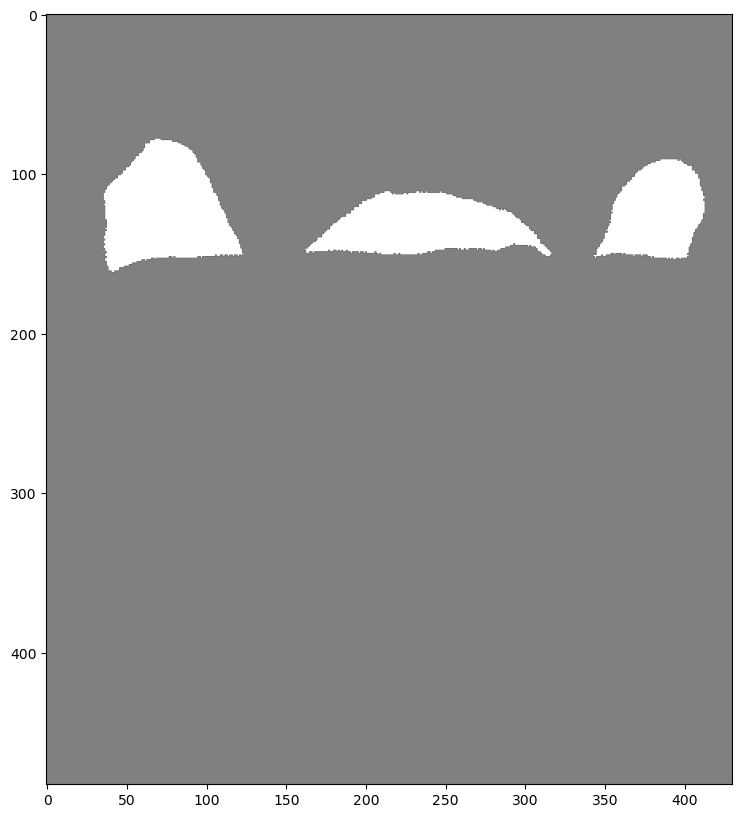

In [30]:
fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

ax.set_facecolor('gray')

ax.imshow(im_data_masked_good) # then we plot our Stitch image over the top

plt.show() # this gets rid of the print memory address thing

We can do the same thing for the "bad" pixels.  This is the color RGBA combo of: (126, 22, 33, 255)

In [31]:
pixel_mask_bad = (im_data[:,:,0] == 126) & \
                  (im_data[:,:,1] == 22) & \
                  (im_data[:,:,2] == 33) & \
                  (im_data[:,:,3] == 255)
# Note the "\" is a line continuation character --> make sure you don't have anything, even a space after it!

In [32]:
nbad = len(im_data[pixel_mask_bad])
nbad

40949

And also plot:

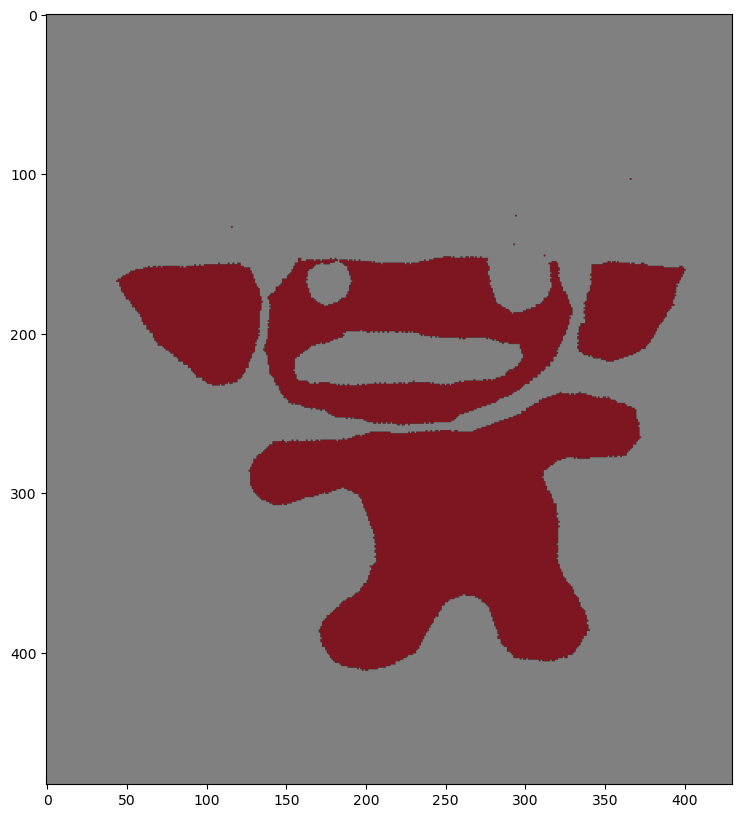

In [33]:
im_data_masked_bad = im_data.copy() # first we make a copy of our original dataset to modify
im_data_masked_bad[~pixel_mask_bad] = 0 # then we set everything that is *NOT* a good pixel to 0 so it will show up gray
# Note here the "~" is the opposite mask of our good pixel mask

fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

ax.set_facecolor('gray')

ax.imshow(im_data_masked_bad) # then we plot our Stitch image over the top

plt.show() # this gets rid of the print memory address thing

We can then calculate the goodness/badness ratio as their respective numbers divided by the total number of interior pixels: 

$\rm{goodness \, \%} = \frac{ngood}{ngood+nbad}$

$\rm{badness \, \%} = \frac{nbad}{ngood+nbad}$

In [34]:
total = ngood + nbad
badness = nbad / total
goodness = ngood/  total
print(badness, goodness)

0.774405234691176 0.22559476530882408


So, it looks like about 77% bad and 23% good, by volume.  Does that match up with what you'd think from looking at the above figure?

We can now plot the goodness and badness levels with a little bar plot that may show these levels a bit more accurately.  We'll also add a little legend to show what is "goodness" and "badness" colors.

Note, there is a nice diagram of the named colors in Python below:

<img src="https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_003.png" width="600px">

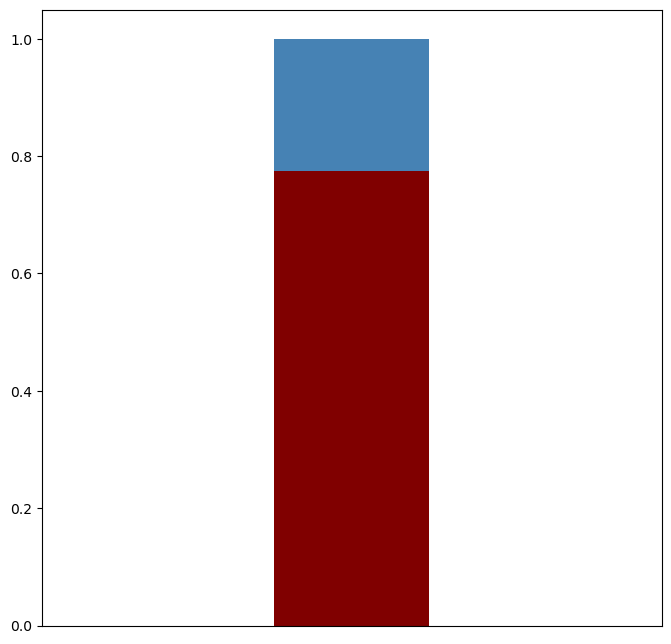

In [35]:
fig, ax = plt.subplots(figsize=(8,8))

ax.bar([1], badness, [0.5], color='maroon', label="badness") # this just plots a bar centered at 1 with a width of 0.5

ax.bar([1], goodness, [0.5], color="steelblue", 
       bottom=badness, label="goodness") # this plots a bar *on top* of the badness bar

ax.set_xlim(0.0, 2.0) # to center around our bar

# since our x-axis are meaningless, we want to "hide" them (see week01's notebook):
ax.xaxis.set_visible(False)

plt.show()

What if we just counted pixes from our figure above? Looks like good changes to badness at ~150, image top is at ~75 pixels image bottom is at ~425 pixels:

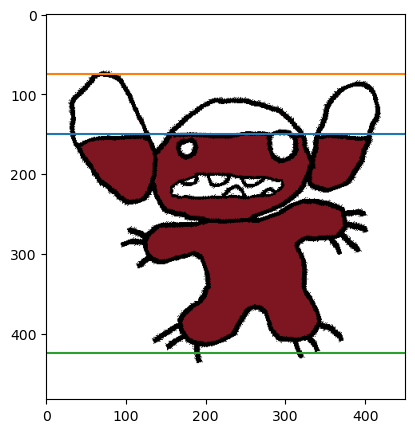

In [36]:
# Let's remind ourselves a bit of what this image looks like
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(im)

ax.plot([0,450], [150, 150]) # approximate badness line
ax.plot([0,450], [75, 75]) # approximate top line
ax.plot([0,450], [425, 425]) # approximate bottom line

ax.set_xlim(0,450)

plt.show()

In [37]:
# so:
goodness_apparent = (75-150)/(75-425)

In [38]:
# what is badness, apparent
1.0-goodness_apparent

0.7857142857142857

## 2.B RGB decomposition of images (+ talking about HW2 ~30 minutes )

Now that we've made some image-plots of Stitch and quantified his goodness/badness levels, let's also quantify an aspect of the image that we will talk more about next week -- its color representation.

We already saw that its got a very few colors, and looked at the ones associated with "goodness" and "badness", but let's delve a little deeper and see how we can plot ALL the colors in an image using histograms.

For example, let's plot the histogram of the red channel:

In [39]:
# recall:
im_data.shape

(483, 430, 4)

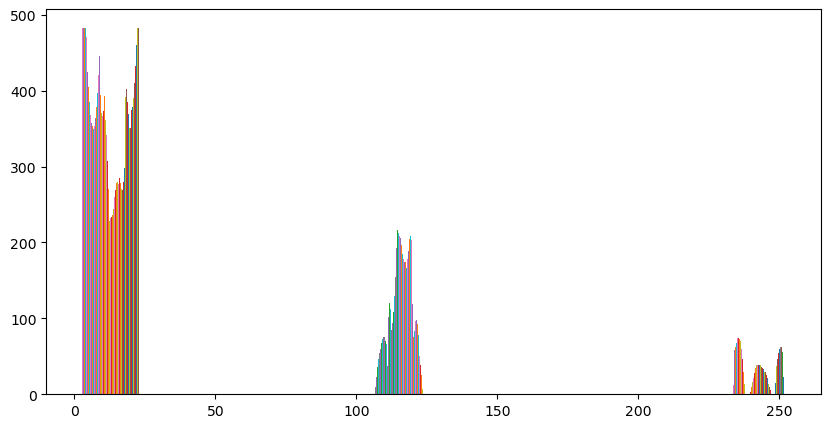

In [40]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(im_data[:,:,0]) # 0 = red

plt.show()

So, this looks a little weird, but why?  We'll if we look at the shape of the data input to hist:

In [41]:
im_data[:,:,0].shape

(483, 430)

We see that it is 2D, and by default, `.hist` assumes that 2D data represents a *vector* of values you want to take a histogram of.  In our case, we want each pixel to be counted equally and not part of a row, so we can "unwrap" our data:

In [42]:
im_data[:,:,0].flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

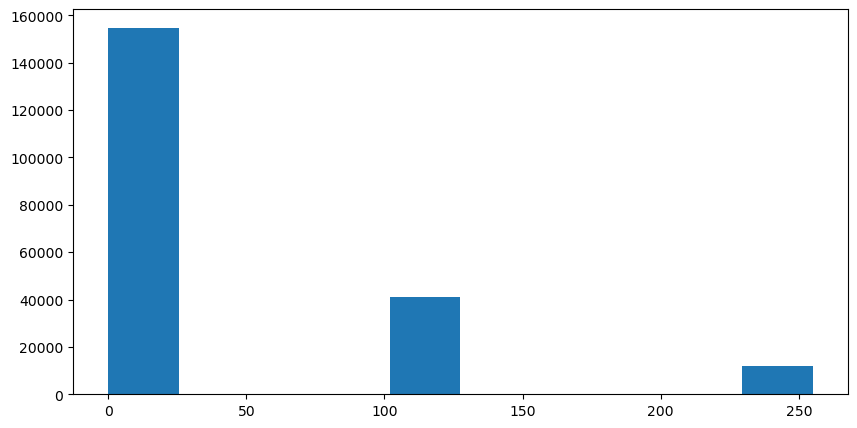

In [43]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(im_data[:,:,0].flatten()) # 0 = red

plt.show()

Also, we note that there is some default binning:

In [44]:
ax.hist?

Since we know that the red channel can go from 0 to 255, this means we have 256 bins -- let's use this explicitly:

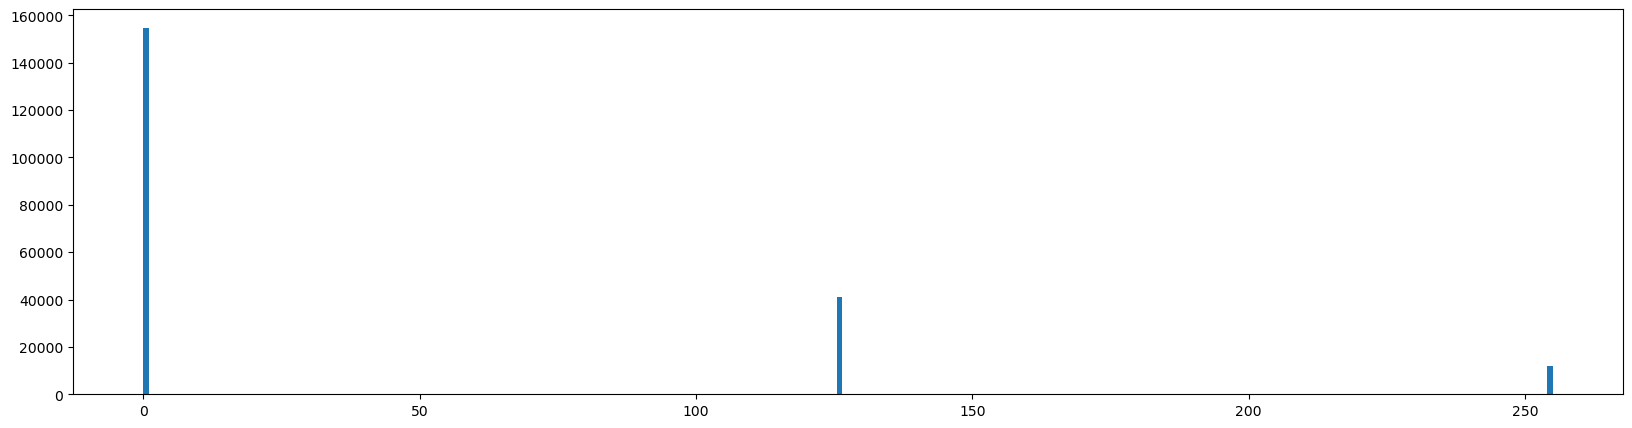

In [45]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(im_data[:,:,0].flatten(),bins=256) # 0 = red

plt.show()

Also, its generally good practice to label our plots, which we can do with `ax.set_` calls:

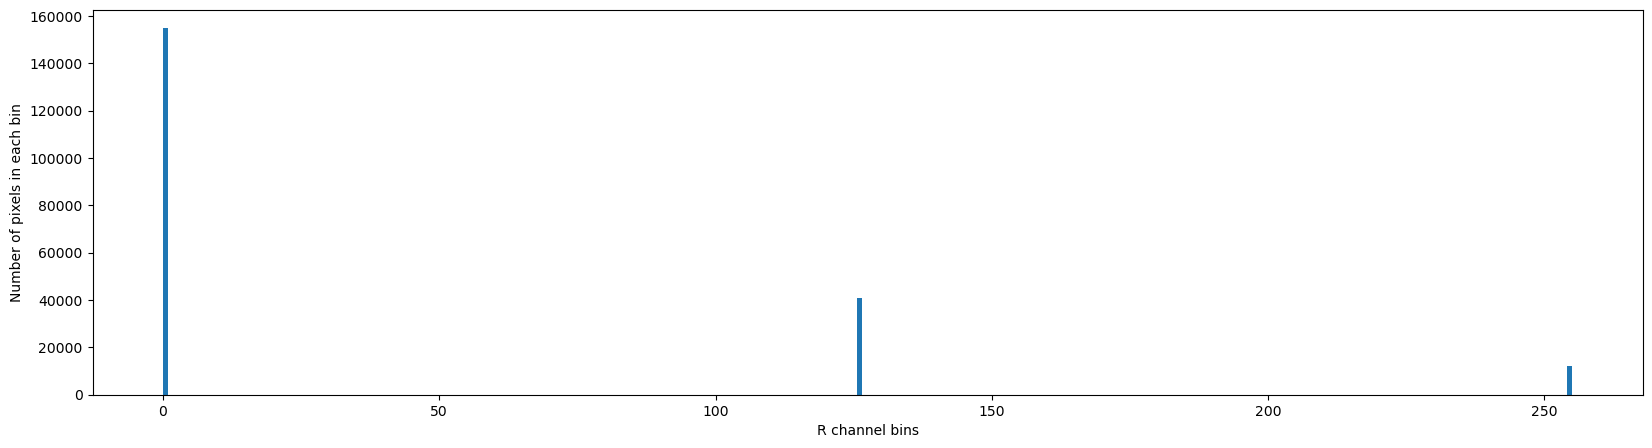

In [46]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(im_data[:,:,0].flatten(),bins=256) # 0 = red

# try ax.set_x and then hit TAB to see a list of options
ax.set_xlabel('R channel bins')

ax.set_ylabel('Number of pixels in each bin')

plt.show()

Generally, we'll want to compare all color channels to each other, so let's include the green channel in our plot:

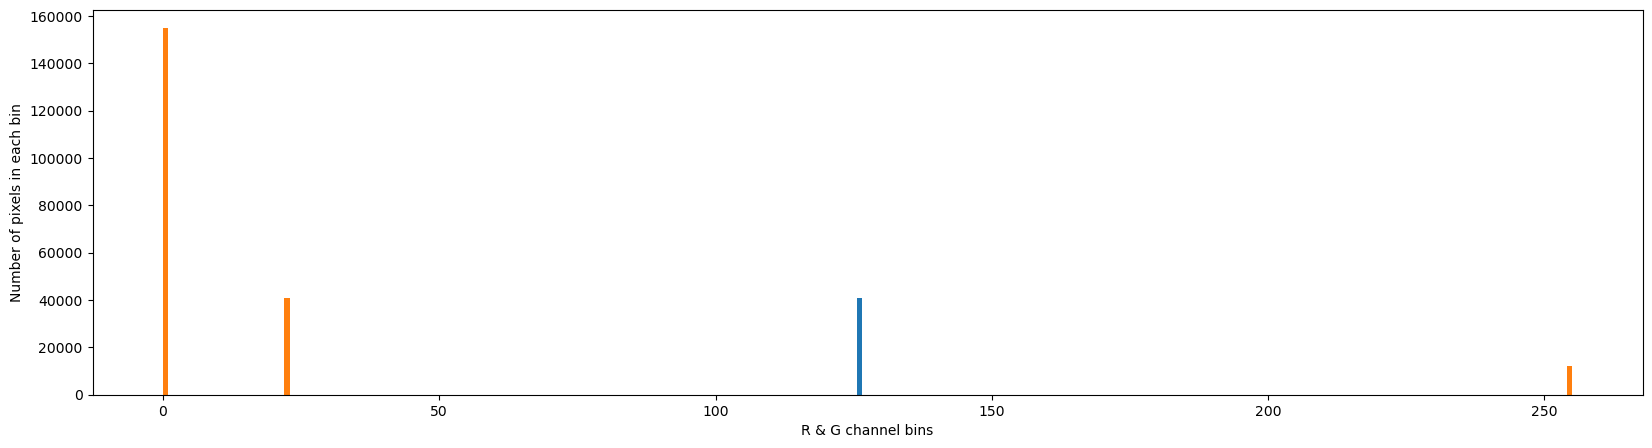

In [47]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(im_data[:,:,0].flatten(),bins=256) # 0 = red
ax.hist(im_data[:,:,1].flatten(),bins=256) # 1 = green

ax.set_xlabel('R & G channel bins') # change here too

ax.set_ylabel('Number of pixels in each bin')

plt.show()

So here, we have a few issues, one is that the colors are wrong AND the bins are overlapping.  One crisis at a time -- let's make sure the colors are correct:

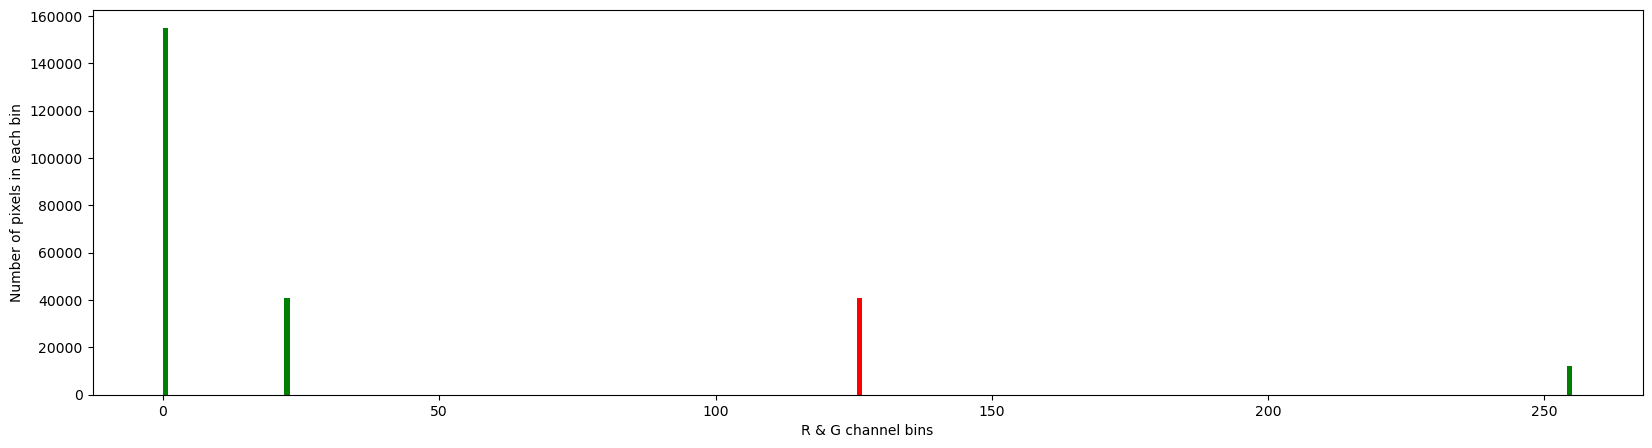

In [48]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax.hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green

ax.set_xlabel('R & G channel bins') # change here too

ax.set_ylabel('Number of pixels in each bin')

plt.show()

Now we are getting there, let's try adding in blue for completeness:

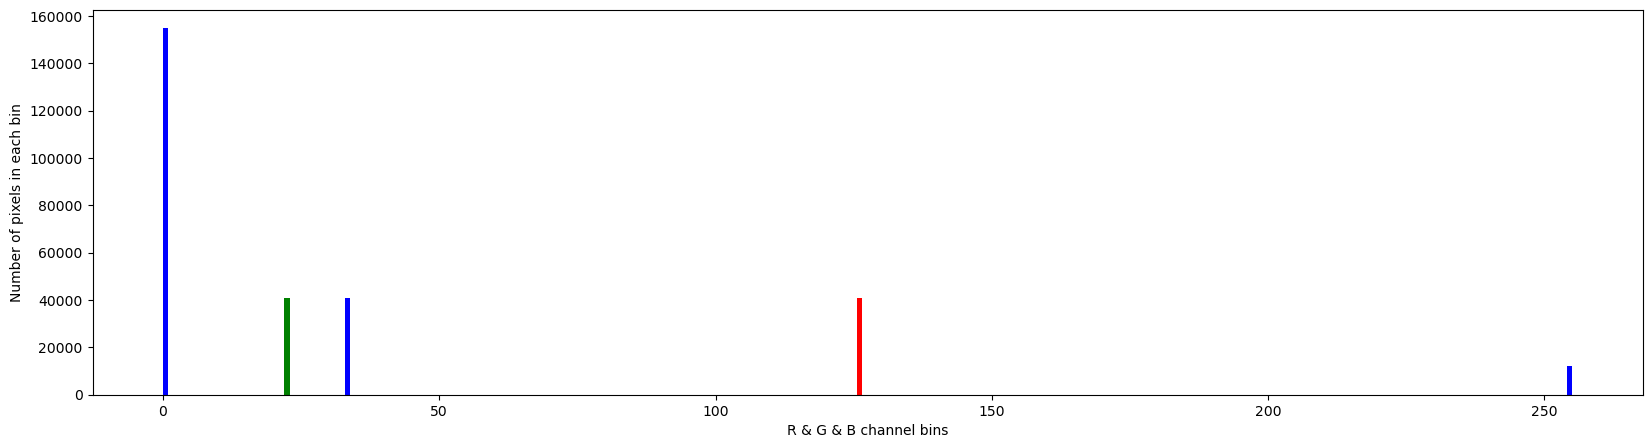

In [49]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax.hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax.hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 1 = blue

ax.set_xlabel('R & G & B channel bins') # change here too

ax.set_ylabel('Number of pixels in each bin')

plt.show()

So, this is better, but its hard to see what parts of the figure are different colors.  We can try changing opacity:

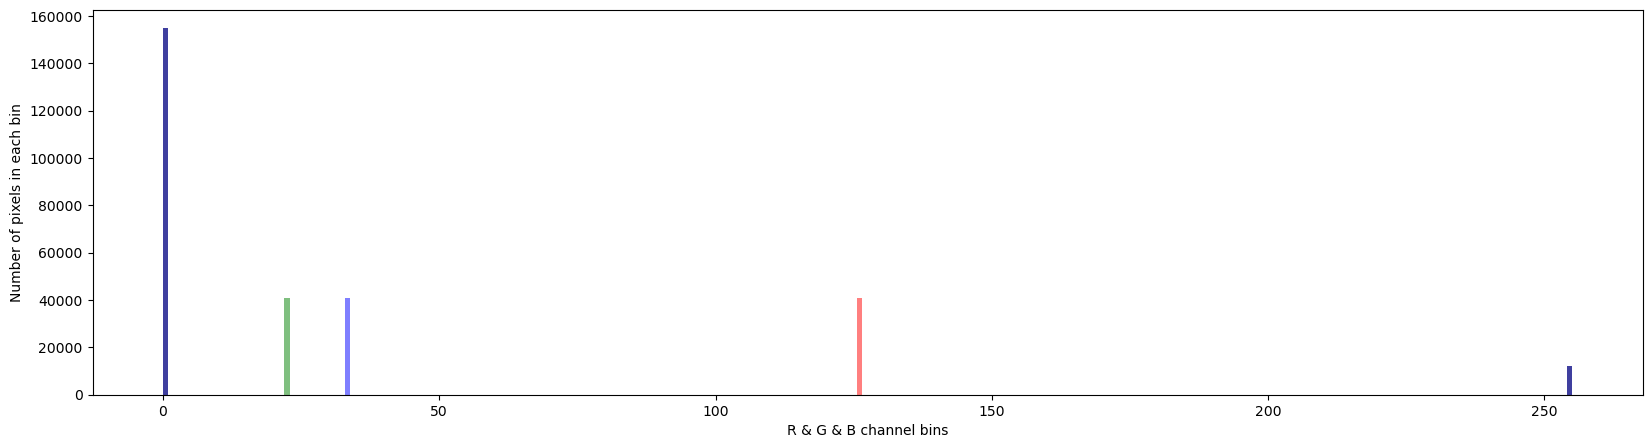

In [50]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(im_data[:,:,0].flatten(),bins=256,color='red', alpha=0.5) # 0 = red
ax.hist(im_data[:,:,1].flatten(),bins=256,color='green', alpha=0.5) # 1 = green
ax.hist(im_data[:,:,2].flatten(),bins=256,color='blue', alpha=0.5) # 1 = blue

ax.set_xlabel('R & G & B channel bins') # change here too

ax.set_ylabel('Number of pixels in each bin')

plt.show()

But that is not quite right either.  One option, is to plot these color channels separately in separate axes:

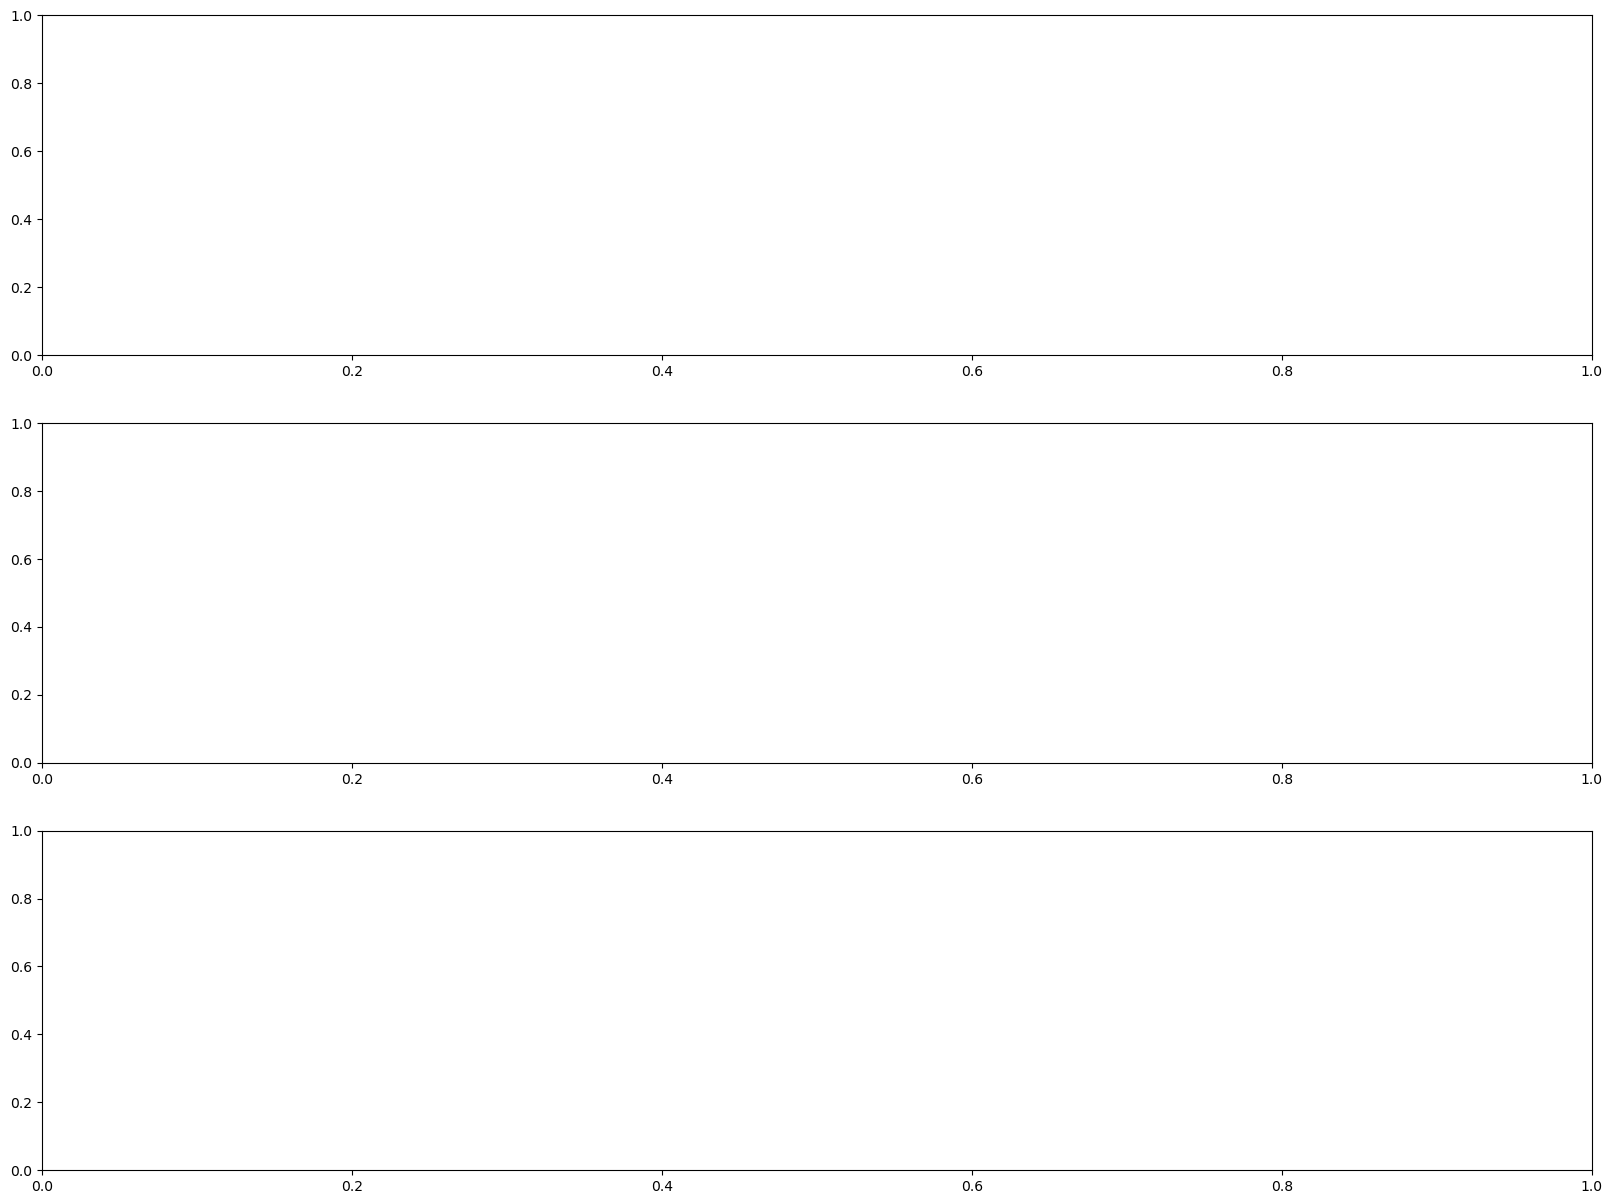

In [51]:
fig, ax = plt.subplots(3,1,figsize=(20,15)) # now we add: #rows, #columns

Now `ax` is actually a vector of axis:

In [52]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5611c3d10>,
      dtype=object)

And we can call each individually like any Python list:

In [53]:
ax[0]

Let's use this to modify our code to plot each color channel as its own histogram plot:

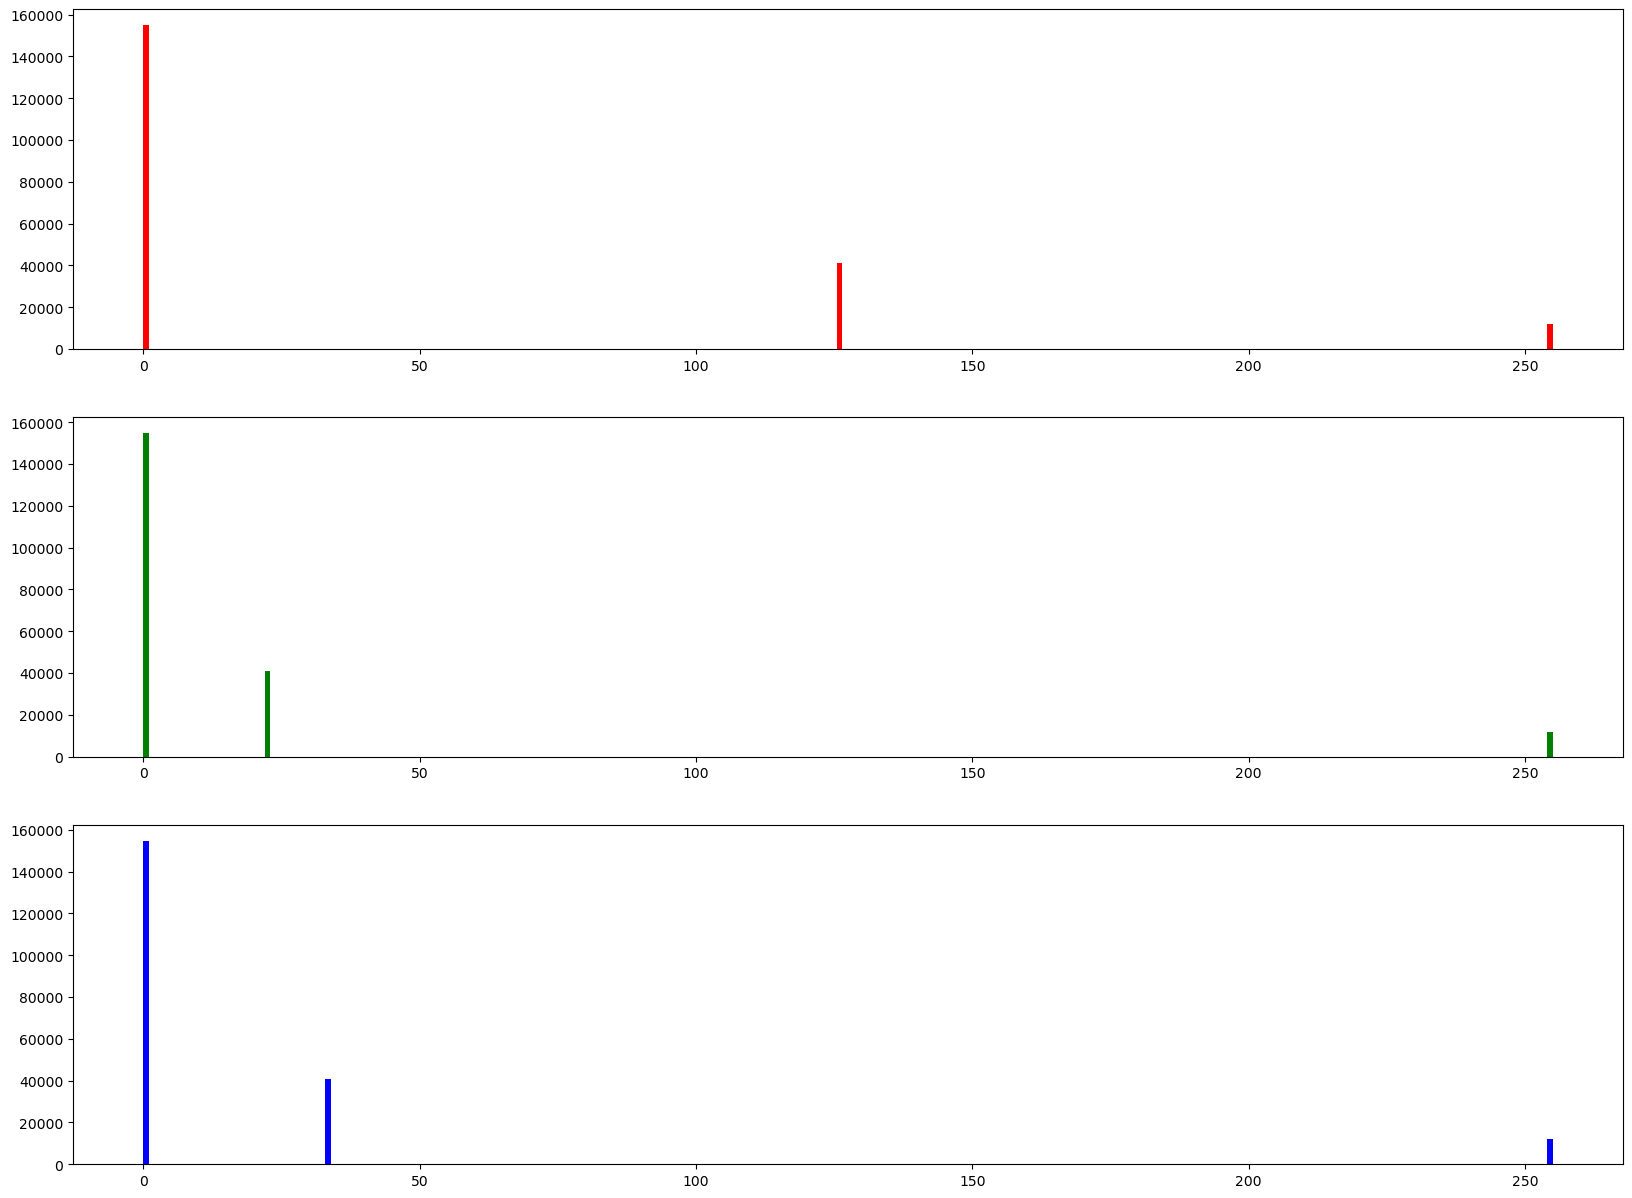

In [54]:
fig, ax = plt.subplots(3,1,figsize=(20,15)) # now we add: #rows, #columns

ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 1 = blue

# these will give you errors:
#ax.set_xlabel('R & G & B channel bins') # change here too
#ax.set_ylabel('Number of pixels in each bin')

plt.show()

Now we have to add axis labels for each:

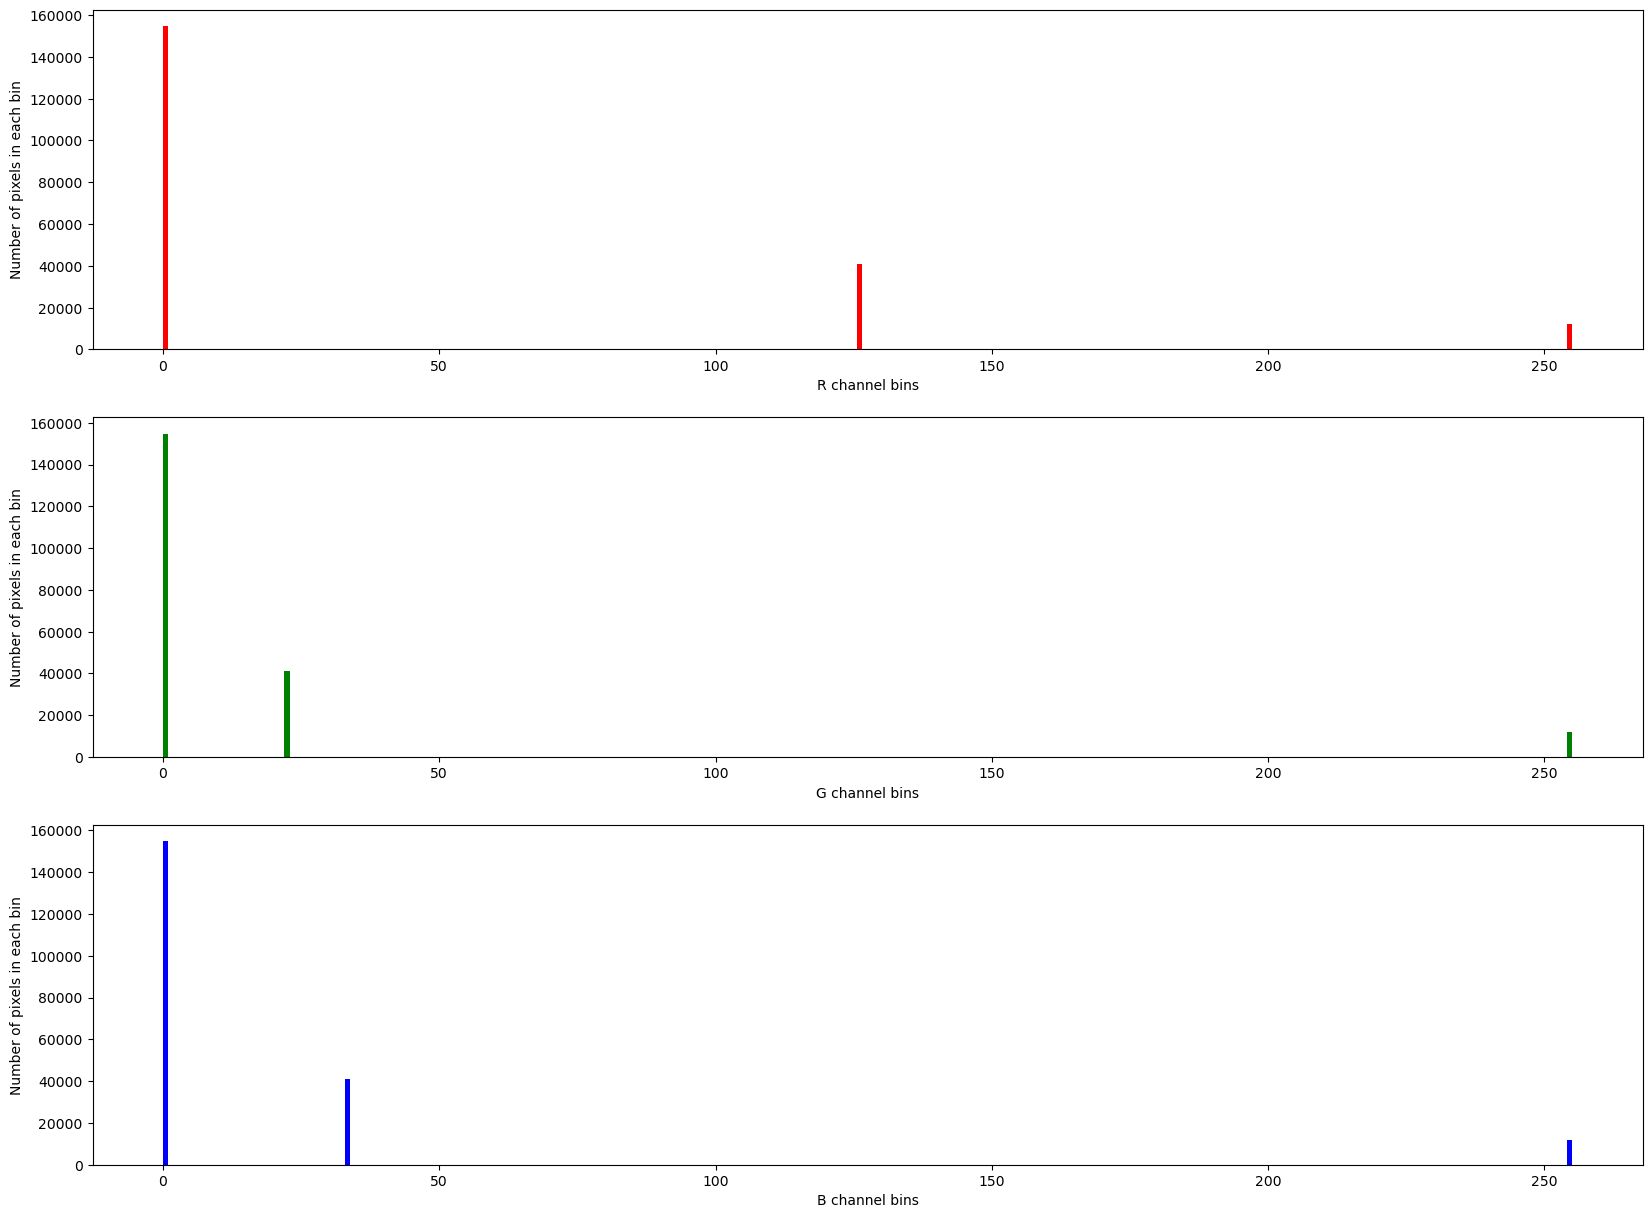

In [55]:
fig, ax = plt.subplots(3,1,figsize=(20,15)) # now we add: #rows, #columns

ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 1 = blue

ax[0].set_xlabel('R channel bins') # change here too
ax[1].set_xlabel('G channel bins') # change here too
ax[2].set_xlabel('B channel bins') # change here too

# note: we can also do this in a for loop:
ax[0].set_ylabel('Number of pixels in each bin')
ax[1].set_ylabel('Number of pixels in each bin')
ax[2].set_ylabel('Number of pixels in each bin')

plt.show()

**ASIDE: in a for loop**

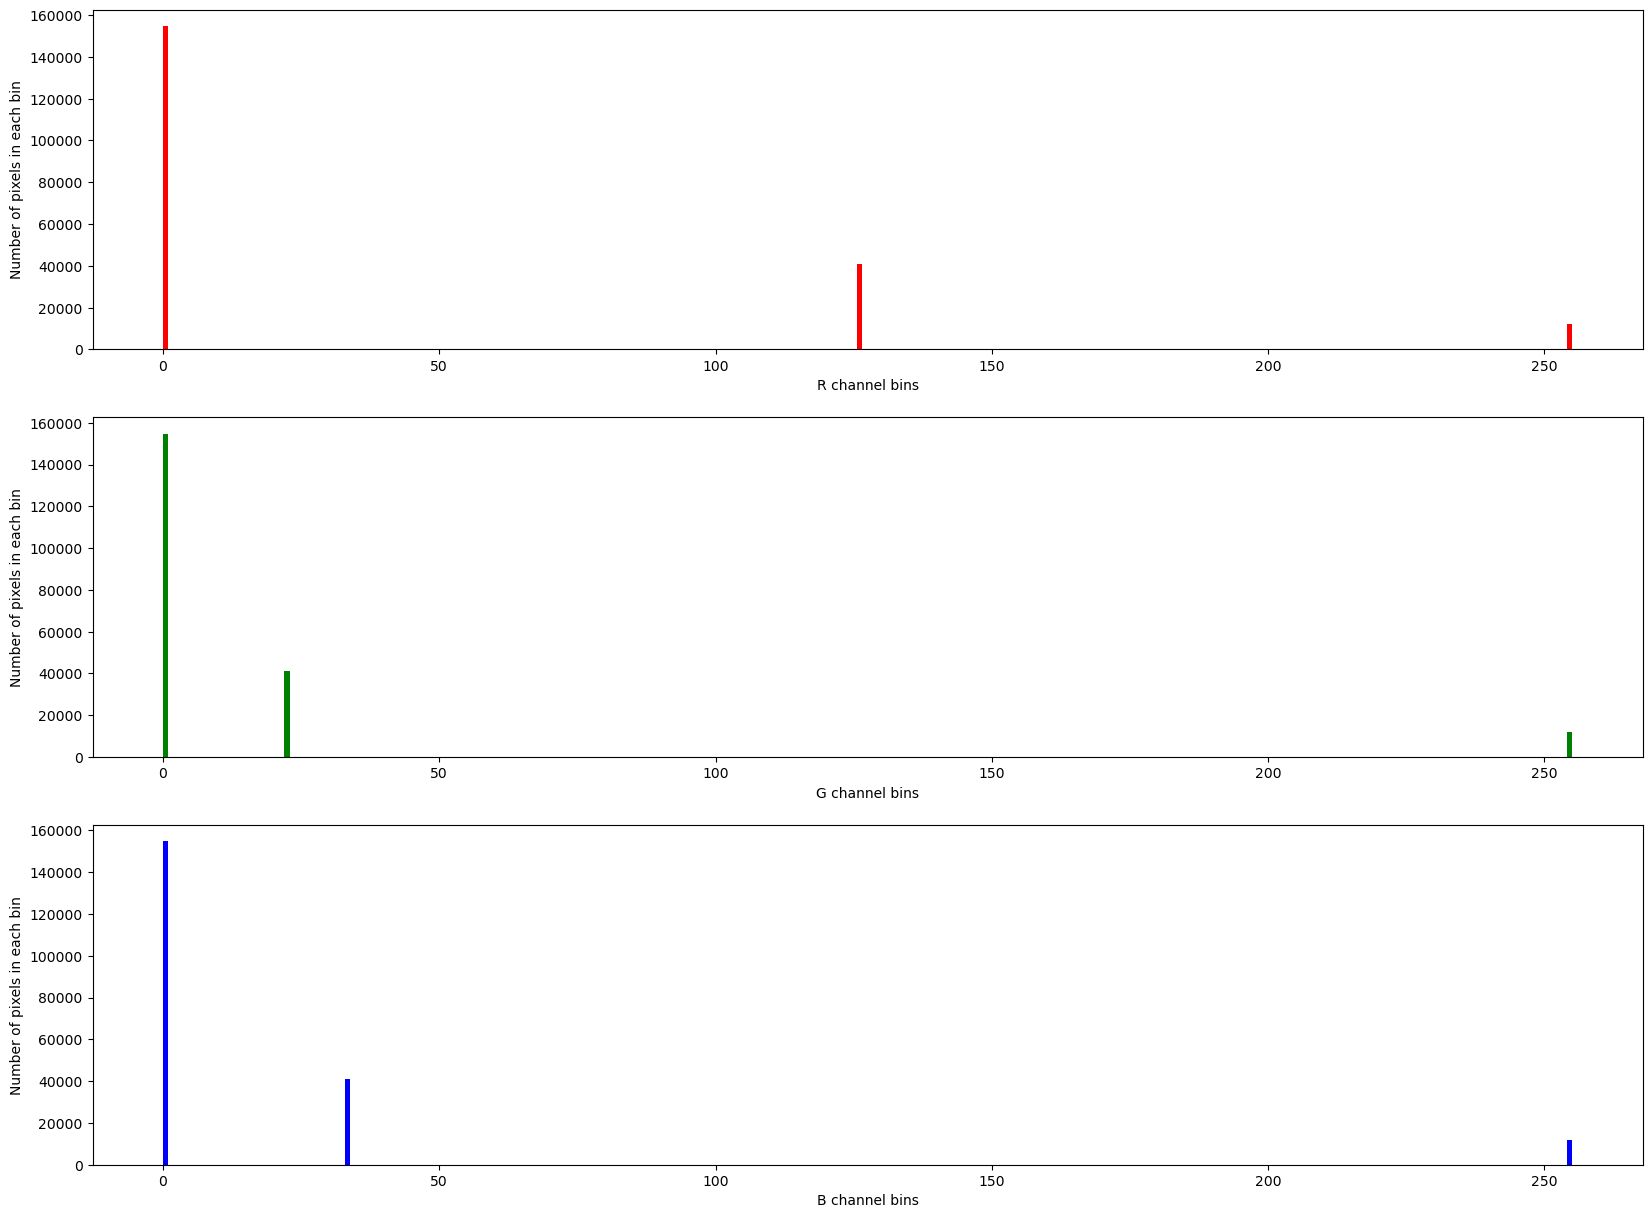

In [56]:
fig, ax = plt.subplots(3,1,figsize=(20,15)) # now we add: #rows, #columns

ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 1 = blue

ax[0].set_xlabel('R channel bins') # change here too
ax[1].set_xlabel('G channel bins') # change here too
ax[2].set_xlabel('B channel bins') # change here too

# note: we can also do this in a for loop:
for k in range(3): ax[k].set_ylabel('Number of pixels in each bin')

plt.show()

**END ASIDE**

Finally, because our image has an alpha channel (note: not all images do!!) we also probably want to plot this as well:

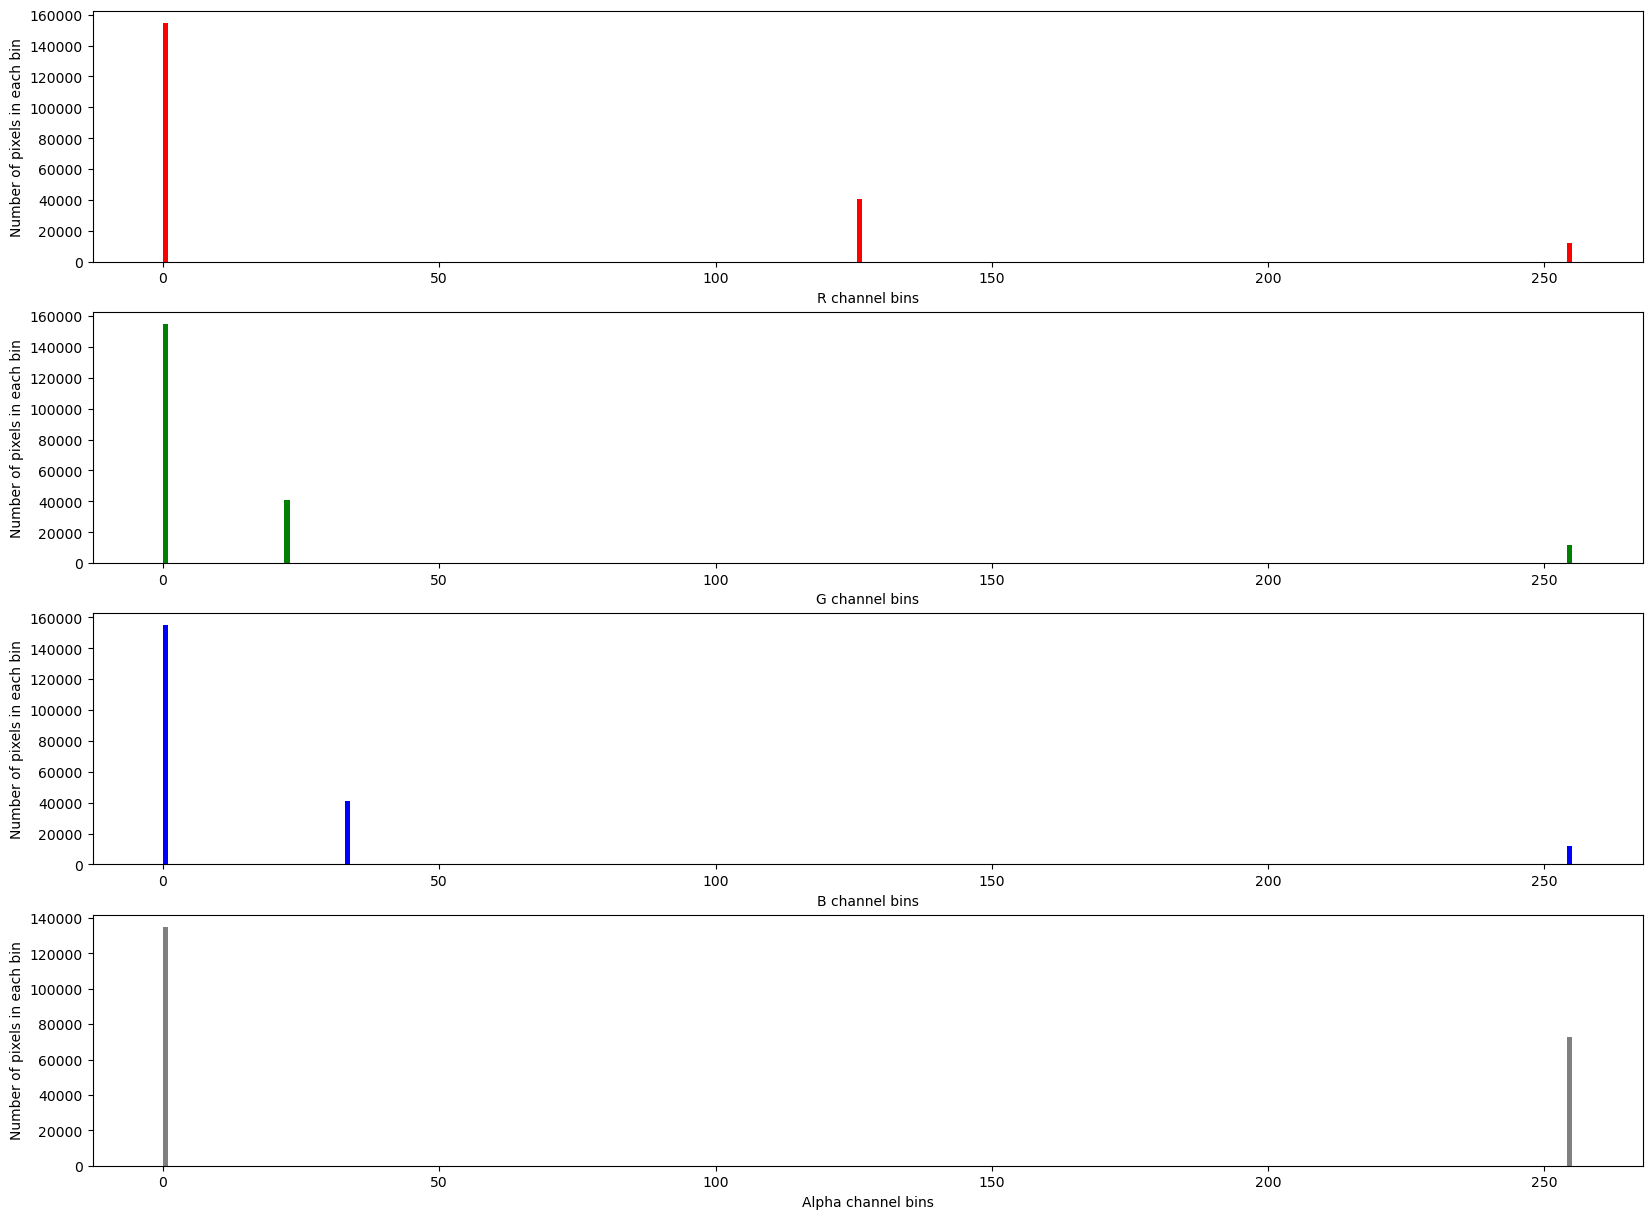

In [57]:
fig, ax = plt.subplots(4,1,figsize=(20,15)) # now we add: #rows, #columns

ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 2 = blue
ax[3].hist(im_data[:,:,3].flatten(),bins=256,color='gray') # 3 = alpha

ax[0].set_xlabel('R channel bins') 
ax[1].set_xlabel('G channel bins') 
ax[2].set_xlabel('B channel bins')
ax[3].set_xlabel('Alpha channel bins') 

ax[0].set_ylabel('Number of pixels in each bin')
ax[1].set_ylabel('Number of pixels in each bin')
ax[2].set_ylabel('Number of pixels in each bin')
ax[3].set_ylabel('Number of pixels in each bin')

plt.show()

So, what does this tell us?  It tells us that a lot of pixels are 0,0,0 -- so we should see a lot of black, *but* because there is a lot of pixels with an alpha-channel of 0 (i.e. perfectly transparent) we don't see a lot of black.

Note: this way of plotting things doesn't show us the *combinations* of RGB(A) values, only their relative distributions.  See the spring2021 notebook for a different way of visualizing this.

Finally, we probably want to plot our image for comparision with this.  One way is just to add another plot to our list:

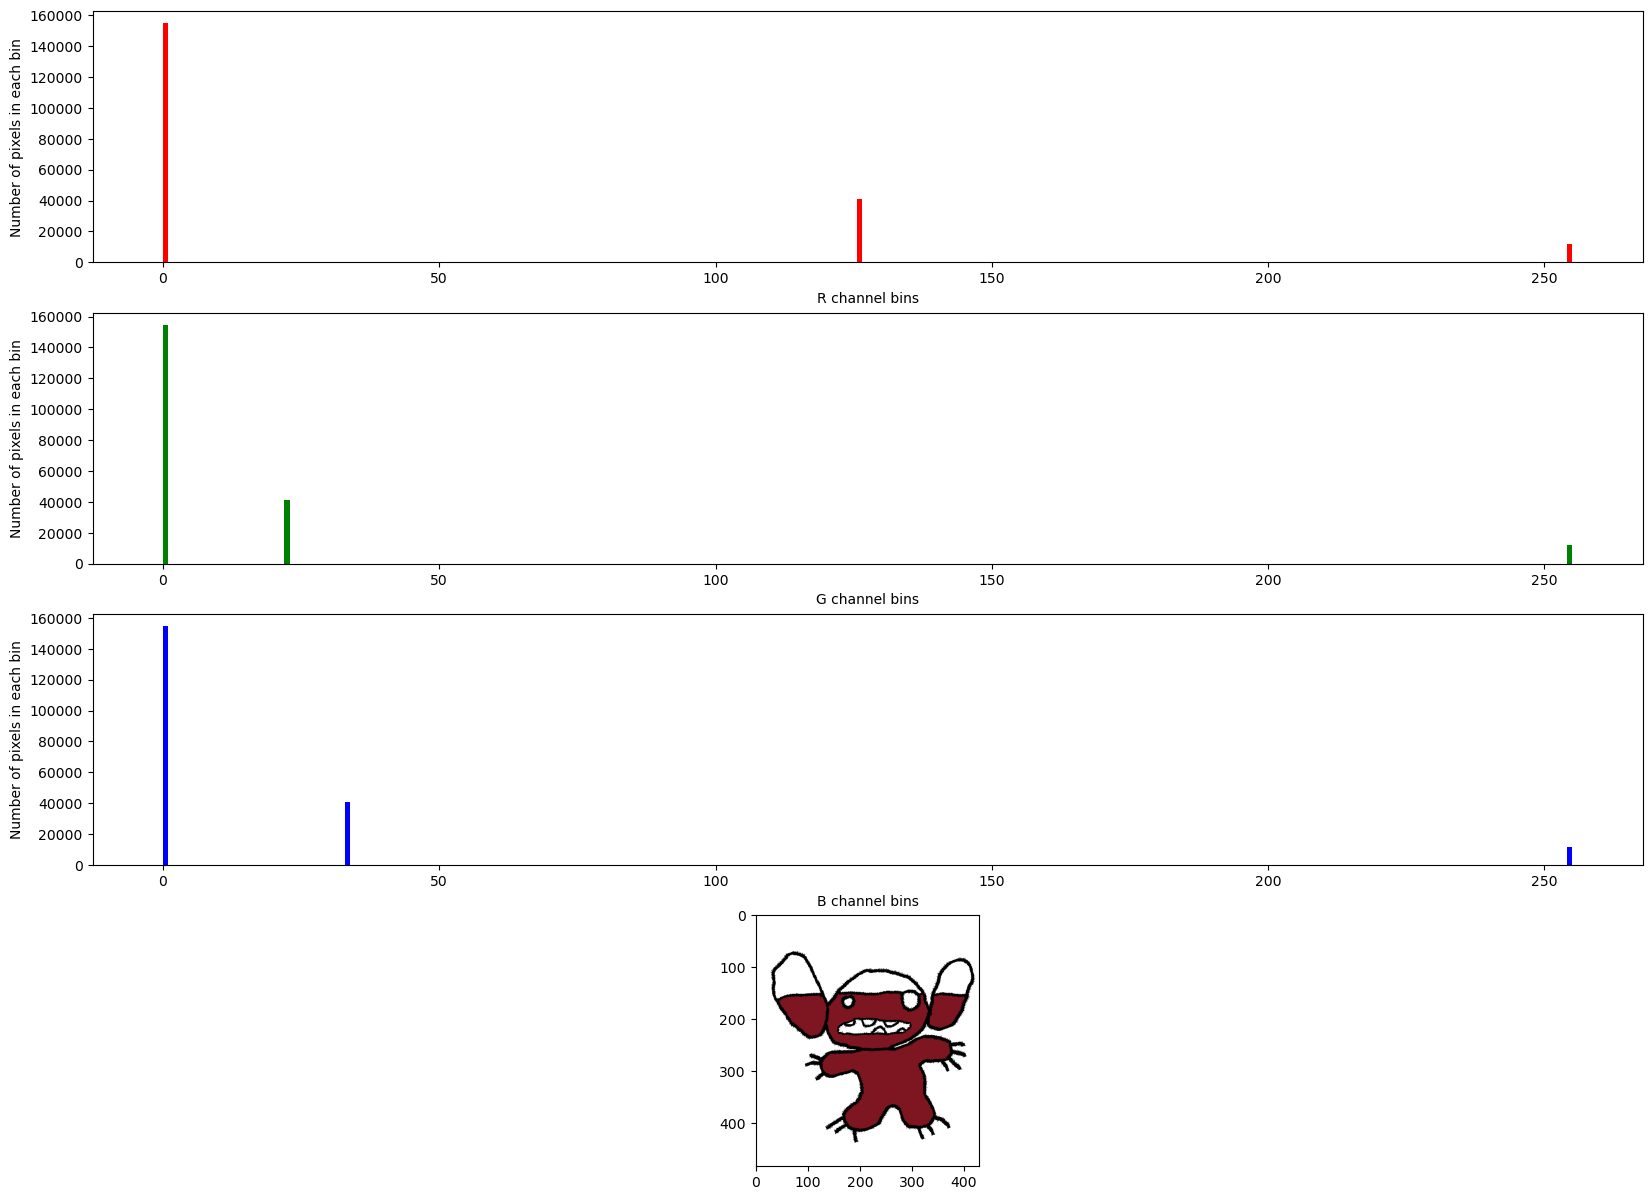

In [58]:
fig, ax = plt.subplots(4,1,figsize=(20,15)) # now we add: #rows, #columns

ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 2 = blue

# here, I'm going to ignore alpha in favor of plotting the image:
ax[3].imshow(im_data)

ax[0].set_xlabel('R channel bins') 
ax[1].set_xlabel('G channel bins') 
ax[2].set_xlabel('B channel bins')

ax[0].set_ylabel('Number of pixels in each bin')
ax[1].set_ylabel('Number of pixels in each bin')
ax[2].set_ylabel('Number of pixels in each bin')

plt.show()

Note: this is perfectly fine for the homework!  However, if you want to get a little fancy, you can check out some other layout options, like gridspec (or mosaic for later matplotlib version): https://matplotlib.org/stable/tutorials/intermediate/gridspec.html

Using this instead of subplots, we could layout our figures to look the same like so:

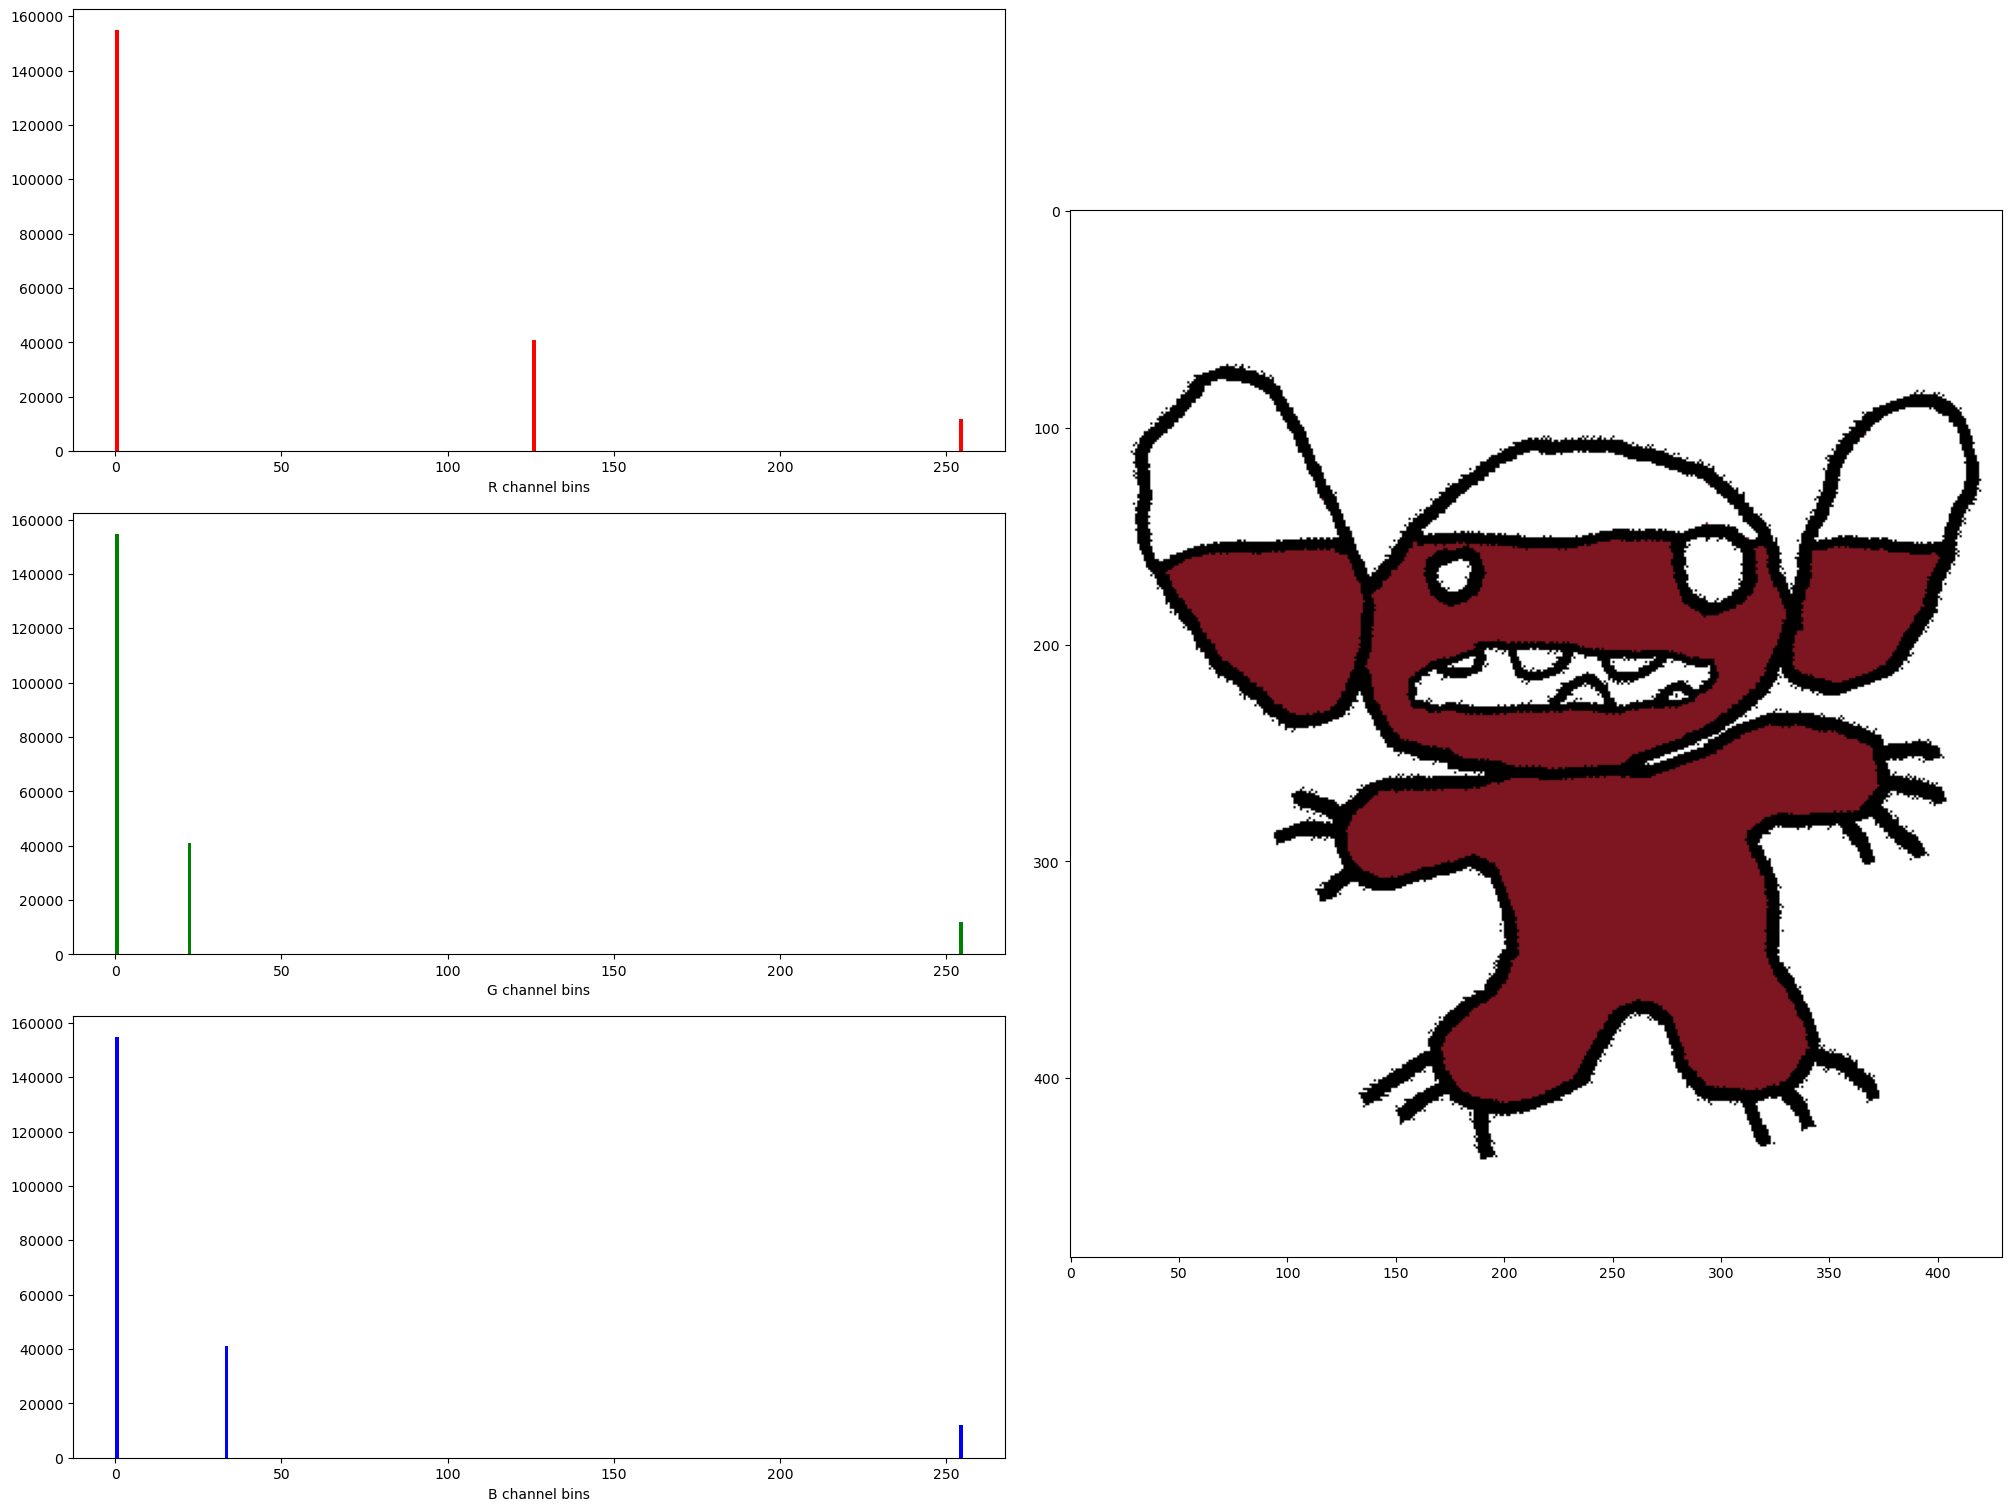

In [59]:
fig = plt.figure(constrained_layout=True, figsize=(20,15))
gs = fig.add_gridspec(3, 2) # three rows, two columns

# add red to the top(0) left (0)
ax1 = fig.add_subplot(gs[0,0]) # red
ax1.hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax1.set_xlabel('R channel bins') 

# green will be middle (1), left (0)
ax2 = fig.add_subplot(gs[1,0]) # green
ax2.hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax2.set_xlabel('G channel bins') 

# blue will be bottom (2), left(0)
ax3 = fig.add_subplot(gs[2,0]) # blue
ax3.hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 2 = blue
ax3.set_xlabel('B channel bins') 

# the image will take up ALL (:) rows of the right (1) column
ax4 = fig.add_subplot(gs[:,1]) # image
ax4.imshow(im_data)

plt.show()

#### Corgi image

So, we see the above has a pretty simple RGB(A) distribution, what about a more complex image?

Let's first grab a more complex image with wget:

In [17]:
!wget https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/littleCorgiInHat.png

--2024-09-05 17:35:30--  https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/littleCorgiInHat.png
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/littleCorgiInHat.png [following]
--2024-09-05 17:35:30--  https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/littleCorgiInHat.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553572 (541K) [image/png]
Saving to: 'littleCorgiInHat.png'

littleCorgiInHat.pn 100%[===================>] 540.60K  --.-KB/s    in 0.05s   

2024-09-05 17:35:30 (11.4 MB/s) - 'littleCorgiInHat.png' saved [553572/

Let's go through the process of reading in this image and changing it into data:

In [18]:
im2 = Image.open('littleCorgiInHat.png')

In [19]:
im2_data = np.array(im2)

Now let's plot!

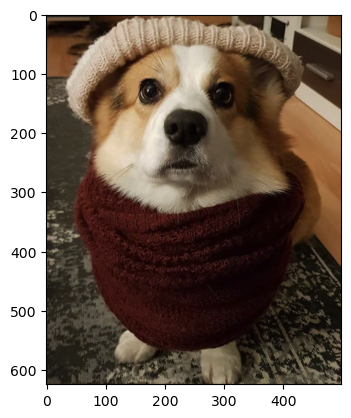

In [20]:
plt.imshow(im2_data)

Adorbs.

Now let's re-use our code for the new image to plot its color distribution:

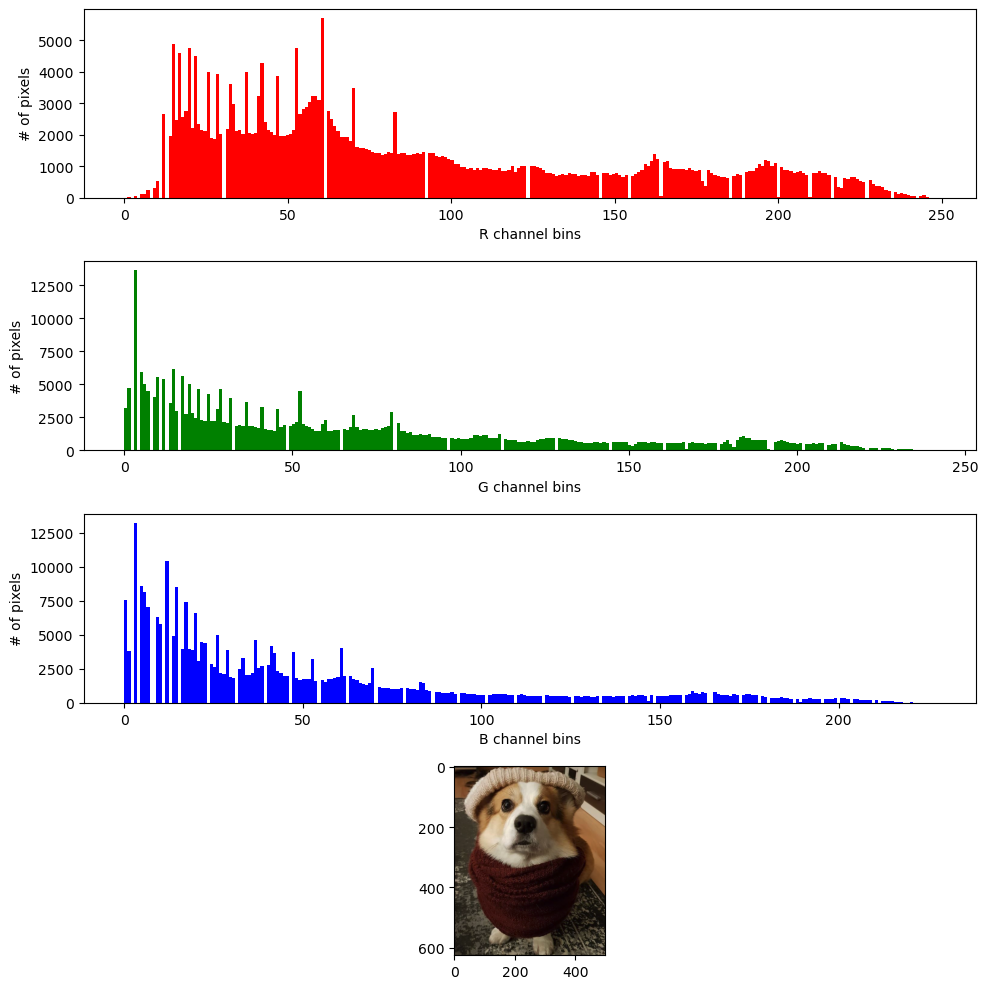

In [25]:
fig, ax = plt.subplots(4,1,figsize=(10,10))
ax[0].hist(im2_data[:,:,0].flatten(), color='red', bins=256)
ax[1].hist(im2_data[:,:,1].flatten(), color='green', bins=256)
ax[2].hist(im2_data[:,:,2].flatten(), color='blue', bins=256)

ax[0].set_xlabel('R channel bins')
ax[1].set_xlabel('G channel bins')
ax[2].set_xlabel('B channel bins')

ax[0].set_ylabel('# of pixels')
ax[1].set_ylabel('# of pixels')
ax[2].set_ylabel('# of pixels')

ax[3].imshow(im2_data)

fig.tight_layout()
plt.show()

What are some things you notice about the differences in the color distributions?

What parts of the histogram correspond to each part of the figure?

In [43]:
# #np.unique(im2_data[:,:,0])
# imgplot = im2_data.copy()
# #mask = im2_data[:,:,0]<50 # low red channel
# mask = (im2_data[:,:,1]<10) & (im2_data[:,:,1]>5) # low blue channel
# imgplot[~mask] = 0

# fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

# ax.set_facecolor('blue')

# ax.imshow(imgplot) # then we plot our Stitch image over the top

In [31]:
im2_data.shape

(625, 499, 4)

# 3. Tabular Data -- typically we get to this in the next week

Let's also try making some histograms from tabular data, in this case a CSV file.

Make sure you have the building inventory downloaded from the class website! https://uiuc-ischool-dataviz.github.io/spring2019online/week02/building_inventory.csv

## EXTRA: 3.A: Python's csv library

We'll use the `csv` library within Python:

In [63]:
import csv

Supply the full path to the CSV file:

In [64]:
f = open("/Users/jnaiman/Downloads/building_inventory.csv")

Here we are just going to read in our data. We can see its sort of in a weird format that isn't terribly intuative to look at.

In [65]:
f.seek(0) # start at the top of the file
for record in csv.reader(f):
    print(record)

['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County', 'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name', 'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired', 'Year Constructed', 'Square Footage', 'Total Floors', 'Floors Above Grade', 'Floors Below Grade', 'Usage Description', 'Usage Description 2', 'Usage Description 3']
['Department of Natural Resources', 'Anderson Lake Conservation Area - Fulton County', 'Anderson Lake C.a.', 'Astoria', '61501', 'Fulton', '17', 'Cheri Bustos', '93', 'Hammond Norine K.', '47', 'Jil Tracy', 'In Use', '1975', '1975', '144', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources', 'Anderson Lake Conservation Area - Fulton County', 'Anderson Lake C.a.', 'Astoria', '61501', 'Fulton', '17', 'Cheri Bustos', '93', 'Hammond Norine K.', '47', 'Jil Tracy', 'In Use', '2004', '2004', '144', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources'

We'll try formatting this data ourselves.  Let's fill up a dictonary with each column and then add data into it later.

In [66]:
f.seek(0)
reader = csv.reader(f)
header = next(reader) # this is just so that we grab only the data columns
header

['Agency Name',
 'Location Name',
 'Address',
 'City',
 'Zip code',
 'County',
 'Congress Dist',
 'Congressional Full Name',
 'Rep Dist',
 'Rep Full Name',
 'Senate Dist',
 'Senator Full Name',
 'Bldg Status',
 'Year Acquired',
 'Year Constructed',
 'Square Footage',
 'Total Floors',
 'Floors Above Grade',
 'Floors Below Grade',
 'Usage Description',
 'Usage Description 2',
 'Usage Description 3']

Now, let's use these data headers to fill in a dictionary with data entries.

Refer to IS452's intro to dictionaries for reference: https://github.com/jnaiman/IS-452AO-Fall2019/blob/master/Lectures/Week-09-Dictionaries.ipynb

In [67]:
data = {} # empty dictonary
for col in header: # for every column name (key in dictionary) in header
    data[col] = [] # add a value to this key and give make it an empty list
data # now we have an empty dictonary with named entries ready to be filled

{'Agency Name': [],
 'Location Name': [],
 'Address': [],
 'City': [],
 'Zip code': [],
 'County': [],
 'Congress Dist': [],
 'Congressional Full Name': [],
 'Rep Dist': [],
 'Rep Full Name': [],
 'Senate Dist': [],
 'Senator Full Name': [],
 'Bldg Status': [],
 'Year Acquired': [],
 'Year Constructed': [],
 'Square Footage': [],
 'Total Floors': [],
 'Floors Above Grade': [],
 'Floors Below Grade': [],
 'Usage Description': [],
 'Usage Description 2': [],
 'Usage Description 3': []}

To fill the dictionary we are going to use the function `zip`.

Here is a little example:

In [68]:
a = ["hi", "there", "my", "friends"]
b = [9, 4, 1, 9]
for word, num in zip(a, b):
    print(word, num)

hi 9
there 4
my 1
friends 9


You can think of if kind of like "enumerate" that we used above, but its iterating over 2 lists here instead of a number and a list.

Let's use `zip` to fill up our dictionary:

In [69]:
# first, a call like before
f.seek(0)
reader = csv.reader(f)
header = next(reader)

# repeat our creation of our data dictionary & initialize to empty lists
data = {}
# fill column names as dictionary headings
for col in header:
    data[col] = []
    
# finally, fill lists within headers
for row in reader:
    for col, val in zip(header, row):
        data[col].append(val)

In [70]:
data

{'Agency Name': ['Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Natural Resources',
  'Department of Corrections',
  'Department of Human Services',
  'Department of Corrections',
  'Department of Transportation',
  'D

We can call our data dictionary like we would any other dictionary, by giving it a `key` and seeing what `values` come with that key.  For example, what values are associated with the `Zip code` key?

In [71]:
data['Zip code']

['61501',
 '61501',
 '61501',
 '61501',
 '61501',
 '61501',
 '62938',
 '62938',
 '61373',
 '61373',
 '61373',
 '61373',
 '62231',
 '62311',
 '62311',
 '62311',
 '62311',
 '62311',
 '62311',
 '62311',
 '62311',
 '62534',
 '62534',
 '60420',
 '60432',
 '62203',
 '61844',
 '62454',
 '61341',
 '62832',
 '62832',
 '62832',
 '60466',
 '60466',
 '60466',
 '62685',
 '62707',
 '61943',
 '61943',
 '61943',
 '61943',
 '61943',
 '61943',
 '61943',
 '61943',
 '62534',
 '61858',
 '61727',
 '61727',
 '61727',
 '61727',
 '61727',
 '61727',
 '61727',
 '61727',
 '61727',
 '61727',
 '60434',
 '60048',
 '62056',
 '62702',
 '62254',
 '62401',
 '61233',
 '61063',
 '62706',
 '61761',
 '61761',
 '61761',
 '61761',
 '61761',
 '61761',
 '62324',
 '61491',
 '61491',
 '61491',
 '61491',
 '61491',
 '61491',
 '61491',
 '61491',
 '62701',
 '61846',
 '62627',
 '62203',
 '61943',
 '61943',
 '61943',
 '61061',
 '61341',
 '62231',
 '62701',
 '62701',
 '60434',
 '60434',
 '61443',
 '61858',
 '60434',
 '61951',
 '61951',


How many?

In [72]:
len(data['Zip code'])

8862

How many unique ones?

In [73]:
np.unique(data['Zip code'])

array(['1235', '60005', '60007', '60016', '60018', '60025', '60030',
       '60031', '60033', '60035', '60041', '60044', '60045', '60048',
       '60050', '60051', '60060', '60062', '60070', '60071', '60077',
       '60081', '60083', '60085', '60093', '60096', '60098', '60099',
       '60103', '60113', '60115', '60120', '60123', '60126', '60130',
       '60137', '60140', '60141', '60160', '60162', '60164', '60165',
       '60174', '60175', '60178', '60181', '60193', '60196', '60304',
       '60406', '60407', '60410', '60411', '60420', '60421', '60423',
       '60424', '60426', '60427', '60432', '60434', '60435', '60436',
       '60439', '60441', '60445', '60447', '60449', '60450', '60451',
       '60452', '60453', '60455', '60466', '60468', '60473', '60477',
       '60481', '60482', '60504', '60506', '60525', '60532', '60534',
       '60540', '60541', '60544', '60545', '60546', '60550', '60551',
       '60555', '60556', '60560', '60601', '60606', '60607', '60608',
       '60612', '6061

Let's try another one:

In [74]:
len(data['Agency Name'])

8862

We can also use keys() to list our dictionary names:

In [75]:
data.keys()

dict_keys(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County', 'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name', 'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired', 'Year Constructed', 'Square Footage', 'Total Floors', 'Floors Above Grade', 'Floors Below Grade', 'Usage Description', 'Usage Description 2', 'Usage Description 3'])

### Making plots using our `data` dictionary

If we want to aggretate our data, we can use something like the `collections` module and the `Counter` object (see IS452 Dictionaries week again for a reminder!)

In [76]:
import collections

For example, here we can create a counter for how many entries have particular agency names:

In [77]:
agency_counter = collections.Counter(data['Agency Name'])
agency_counter

Counter({'Department of Natural Resources': 3223,
         'Department of Corrections': 1428,
         'Department of Human Services': 617,
         'Department of Transportation': 1137,
         'Department of State Police': 109,
         'Department of Military Affairs': 231,
         'Department of Agriculture': 228,
         'Governors State University': 11,
         'Department of Central Management Services': 60,
         'Illinois State University': 102,
         'Historic Preservation Agency': 284,
         'Department of Juvenile Justice': 120,
         'Southern Illinois University': 420,
         'Illinois Medical District Commission': 3,
         'University of Illinois': 525,
         "Department of Veterans' Affairs": 94,
         'Chicago State University': 16,
         'Northern Illinois University': 79,
         'Office of the Secretary of State': 41,
         'Illinois Emergency Management Agency': 2,
         'Western Illinois University': 42,
         'Eastern Illin

We can use these counter objects to make plots like before.  Let's start with a histogram:

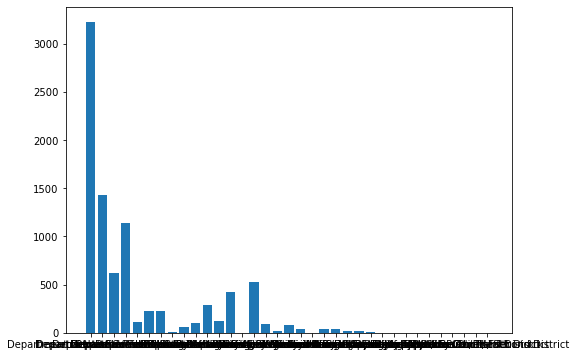

In [78]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(agency_counter.keys(), agency_counter.values())

plt.show()

Wow is it hard to read those labels!  Let's try rotating them!

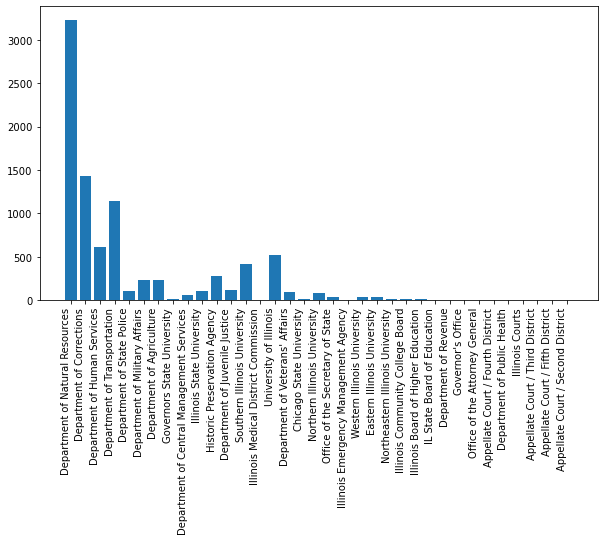

In [79]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(agency_counter.keys(), agency_counter.values())
fig.autofmt_xdate(rotation=90)

# or:
#plt.xticks(rotation=90)

plt.show()

So that is starting to look pretty cool.  What about if we just want to plot the top 10 though since it looks like most of the interesting stuff happens there!

If we recall, we can do this with a counter object:

In [80]:
agency_counter.most_common?

In [81]:
agency_counter_top_10 = agency_counter.most_common(n=10)

In [82]:
agency_counter_top_10

[('Department of Natural Resources', 3223),
 ('Department of Corrections', 1428),
 ('Department of Transportation', 1137),
 ('Department of Human Services', 617),
 ('University of Illinois', 525),
 ('Southern Illinois University', 420),
 ('Historic Preservation Agency', 284),
 ('Department of Military Affairs', 231),
 ('Department of Agriculture', 228),
 ('Department of Juvenile Justice', 120)]

Note that the above is now a list, not a dictionary so we have to reformat a bit if we want to plot things:

In [83]:
agency_counter_top_10[0]

('Department of Natural Resources', 3223)

In [84]:
agency_counter_top_10[0][0], agency_counter_top_10[0][1]

('Department of Natural Resources', 3223)

In [85]:
agency_name_top_10 = []; count = []
for ac in agency_counter_top_10:
    agency_name_top_10.append(ac[0])
    count.append(ac[1])

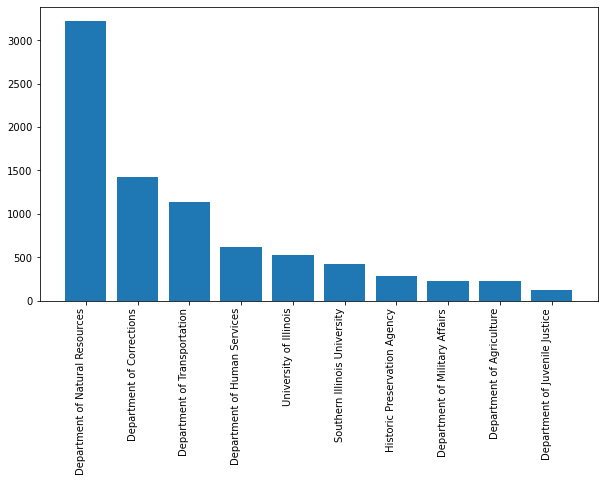

In [86]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(agency_name_top_10, count)
fig.autofmt_xdate(rotation=90)

plt.show()

## 3.B Pandas

We can also do a lot of these things with the `pandas` library.

(This is something you can pip or anaconda install if you need to.)

In [89]:
import pandas as pd

In [90]:
buildings = pd.read_csv('/Users/jnaiman/Downloads/building_inventory.csv')

In [91]:
buildings
# formatting here is sort of nice

Agency Name  \
0      Department of Natural Resources   
1      Department of Natural Resources   
2      Department of Natural Resources   
3      Department of Natural Resources   
4      Department of Natural Resources   
...                                ...   
8857      Department of Transportation   
8858      Department of Transportation   
8859      Department of Transportation   
8860  Illinois Community College Board   
8861    Department of Military Affairs   

                                          Location Name  \
0       Anderson Lake Conservation Area - Fulton County   
1       Anderson Lake Conservation Area - Fulton County   
2       Anderson Lake Conservation Area - Fulton County   
3       Anderson Lake Conservation Area - Fulton County   
4       Anderson Lake Conservation Area - Fulton County   
...                                                 ...   
8857  Belvidere Maintenance Storage Facility - Boone...   
8858  Belvidere Maintenance Storage Facility - Boone...   
8859                Quincy Maintenance Storage Facility   
8860        Illinois Valley Community College - Oglesby   
8861              Peoria Army Aviation Support Facility   

                             Address       City  Zip code   County  \
0                 Anderson Lake C.a.    Astoria     61501   Fulton   
1                 Anderson Lake C.a.    Astoria     61501   Fulton   
2                 Anderson Lake C.a.    Astoria     61501   Fulton   
3                 Anderson Lake C.a.    Astoria     61501   Fulton   
4                 Anderson Lake C.a.    Astoria     61501   Fulton   
...                              ...        ...       ...      ...   
8857           9797 Illinois Rte. 76  Belvidere     61008    Boone   
8858            9797 Illinois Rte 76  Belvidere     61008    Boone   
8859                 800 Koch's Lane     Quincy     62305    Adams   
8860  815 North Orlando Smith Avenue    Oglesby     61348  LaSalle   
8861              2323 S. Airport Rd     Peoria     61607   Peoria   

      Congress Dist Congressional Full Name  Rep Dist       Rep Full Name  \
0                17            Cheri Bustos        93   Hammond Norine K.   
1                17            Cheri Bustos        93   Hammond Norine K.   
2                17            Cheri Bustos        93   Hammond Norine K.   
3                17            Cheri Bustos        93   Hammond Norine K.   
4                17            Cheri Bustos        93   Hammond Norine K.   
...             ...                     ...       ...                 ...   
8857             16          Adam Kinzinger        69       Sosnowski Joe   
8858             16          Adam Kinzinger        69       Sosnowski Joe   
8859             18         Darin M. LaHood        94      Frese Randy E.   
8860             16          Adam Kinzinger        76      Long Jerry Lee   
8861             17            Cheri Bustos        92  Gordon-Booth Jehan   

      ...  Bldg Status Year Acquired Year Constructed  Square Footage  \
0     ...       In Use          1975             1975             144   
1     ...       In Use          2004             2004             144   
2     ...       In Use          2004             2004             144   
3     ...       In Use          2004             2004             144   
4     ...       In Use          2004             2004             144   
...   ...          ...           ...              ...             ...   
8857  ...       In Use             0                0             432   
8858  ...       In Use             0                0             330   
8859  ...       In Use             0             1987             130   
8860  ...       In Use          1971             1971           49552   
8861  ...  In Progress             0             2017             288   

      Total Floors  Floors Above Grade  Floors Below Grade  \
0                1                   1                   0   
1                1                   1        

Pandas comes with a lot of nice built in functions like for example, we can easily count how many entries there are in this dataset:

In [92]:
# how many entries are there? as an iterable
buildings.index

RangeIndex(start=0, stop=8862, step=1)

We can print out slices of our dataset by index like so:

In [93]:
buildings.iloc[0:3] # subset by index

Agency Name  \
0  Department of Natural Resources   
1  Department of Natural Resources   
2  Department of Natural Resources   

                                     Location Name             Address  \
0  Anderson Lake Conservation Area - Fulton County  Anderson Lake C.a.   
1  Anderson Lake Conservation Area - Fulton County  Anderson Lake C.a.   
2  Anderson Lake Conservation Area - Fulton County  Anderson Lake C.a.   

      City  Zip code  County  Congress Dist Congressional Full Name  Rep Dist  \
0  Astoria     61501  Fulton             17            Cheri Bustos        93   
1  Astoria     61501  Fulton             17            Cheri Bustos        93   
2  Astoria     61501  Fulton             17            Cheri Bustos        93   

       Rep Full Name  ...  Bldg Status Year Acquired Year Constructed  \
0  Hammond Norine K.  ...       In Use          1975             1975   
1  Hammond Norine K.  ...       In Use          2004             2004   
2  Hammond Norine K.  ...       In Use          2004             2004   

   Square Footage  Total Floors  Floors Above Grade  Floors Below Grade  \
0             144             1                   1                   0   
1             144             1                   1                   0   
2             144             1                   1                   0   

   Usage Description  Usage Description 2 Usage Description 3  
0            Unusual              Unusual        Not provided  
1            Unusual              Unusual        Not provided  
2            Unusual              Unusual        Not provided  

[3 rows x 22 columns]

We can build up querys, like grab the agency name of the 100-110'th entries:

In [94]:
buildings.iloc[100:110]["Agency Name"] # grab 1-10 entries, and print out the Agency names of those entries

100    Department of Natural Resources
101    Department of Natural Resources
102    Department of Natural Resources
103    Department of Natural Resources
104    Department of Natural Resources
105    Department of Natural Resources
106    Department of Natural Resources
107    Department of Natural Resources
108    Department of Natural Resources
109     Department of Juvenile Justice
Name: Agency Name, dtype: object

We can use NumPy-like functions, like counting how many unique agency names are in our dataset:

In [95]:
buildings["Agency Name"].nunique() # how many unique agencies

35

We can also do this with categorical data, like the building status:

In [96]:
buildings["Bldg Status"].unique() 

array(['In Use', 'Abandon', 'In Progress'], dtype=object)

If you are used to R at all, the `describe` function is sort of like "summary" function, and basically giving some summary statistics for the numerical data in our dataset.

Note that some of these statistics don't make sense, for example the "mean" zip code doesn't make physical sense.

In [97]:
buildings.describe()

Zip code  Congress Dist     Rep Dist  Senate Dist  Year Acquired  \
count   8862.000000    8862.000000  8862.000000  8862.000000    8862.000000   
mean   61821.076845      13.404085    92.303318    46.408599    1913.267660   
std     1095.203357       4.037936    23.568457    11.781038     337.024796   
min     1235.000000       0.000000     0.000000     0.000000       0.000000   
25%    61105.000000      12.000000    79.000000    40.000000    1957.000000   
50%    62023.000000      14.000000    97.000000    49.000000    1975.000000   
75%    62650.000000      16.000000   110.000000    55.000000    1992.000000   
max    68297.000000      18.000000   119.000000    60.000000    2019.000000   

       Year Constructed  Square Footage  Total Floors  Floors Above Grade  \
count       8862.000000    8.862000e+03   8862.000000         8862.000000   
mean        1906.135184    1.147603e+04      1.636087            1.449334   
std          351.180642    3.817263e+04      1.537603            1.286898   
min            0.000000    0.000000e+00      0.000000            0.000000   
25%         1953.000000    2.330000e+02      1.000000            1.000000   
50%         1974.000000    1.600000e+03      1.000000            1.000000   
75%         1991.000000    6.426500e+03      2.000000            1.000000   
max         2019.000000    1.200000e+06     31.000000           30.000000   

       Floors Below Grade  
count         8862.000000  
mean             0.161589  
std              0.392717  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              4.000000

Instead of using `.iloc` before, we can filter our data by using `.loc` which allows us to pass filtering information.

For example, let's only look at buildings that have zero square footage:

In [98]:
buildings.loc[buildings["Square Footage"] == 0] # boolean operation inside means zero square footage

Agency Name  \
74    Department of Natural Resources   
76    Department of Natural Resources   
181         Department of Corrections   
333      Department of Transportation   
421      Northern Illinois University   
422      Northern Illinois University   
507   Department of Natural Resources   
540         Department of Agriculture   
551   Department of Natural Resources   
552   Department of Natural Resources   
805   Department of Natural Resources   
1064     Department of Transportation   
1148  Department of Natural Resources   
1149  Department of Natural Resources   
1151  Department of Natural Resources   
1163  Department of Natural Resources   
1473  Department of Natural Resources   
1827  Department of Natural Resources   
2289     Department of Human Services   
2290     Department of Human Services   
2291     Department of Human Services   
2384  Department of Natural Resources   
2385  Department of Natural Resources   
2391     Historic Preservation Agency   
2392  Department of Natural Resources   
2402  Department of Natural Resources   
2407  Department of Veterans' Affairs   
2408  Department of Veterans' Affairs   
2410  Department of Veterans' Affairs   
2413     Department of Human Services   
2414     Department of Human Services   
2422        Department of Corrections   
2426        Department of Corrections   
2427        Department of Corrections   
2430        Department of Corrections   
2431        Department of Corrections   
2432        Department of Corrections   
2442     Southern Illinois University   
2443     Southern Illinois University   
2457  Department of Natural Resources   
2943  Department of Natural Resources   
3525  Department of Natural Resources   
3530  Department of Natural Resources   
3533  Department of Natural Resources   
3534  Department of Natural Resources   
3535  Department of Natural Resources   
5679        Department of Corrections   
5706        Department of Corrections   
5750        Department of Corrections   
8662  Department of Natural Resources   
8676  Department of Natural Resources   
8677  Department of Natural Resources   
8686     Department of Transportation   
8687     Department of Transportation   
8688     Department of Transportation   
8790     Department of Transportation   
8802   Department of Military Affairs   

                                          Location Name  \
74          Rock Island Trail State Park - Stark County   
76          Rock Island Trail State Park - Stark County   
181       Vandalia Correctional Center - Fayette County   
333                                Gurnee - Lake County   
421               Northern Illinois University - DeKalb   
422               Northern Illinois University - DeKalb   
507            Chain O'Lakes CA and SP - McHenry County   
540            DuQuoin State Fairgrounds - Perry County   
551                  Nauvoo State Park - Hancock County   
552                  Nauvoo State Park - Hancock County   
805         Rice Lake Conservation Area - Fulton County   
1064  Dixon Springs Maintenance Storage Facility - P...   
1148    Saline County Conservation Area - Saline County   
1149    Saline County Conservation Area - Saline County   
1151    Saline County Conservation Area - Saline County   
1163    Saline County Conservation Area - Saline County   
1473                                    Golconda Marina   
1827           Siloam Springs State Park - Adams County   
2289     Tinley Park Mental Health Center - Cook County   
2290     Tinley Park Mental Health Center - Cook County   
2291     Tinley Park Mental Health Center - Cook County   
2384     Giant City State Park & Lodge - Jackson County   
2385     Giant City State Park & Lodge - Jackson County   
2391   Shawneetown Bank Historic Site - Gallatin County   
2392   Starved Rock State Park & Lodge - LaSalle County   
2402          Pere Marquette State Park - Jersey County   
2407                 Illinois Veterans' Home at Manten

We can also filter for ongoing construction:

In [99]:
buildings.loc[buildings["Bldg Status"] == "In Progress"] # who is being built now?

Agency Name  \
772   Department of Veterans' Affairs   
792          Chicago State University   
796   Department of Natural Resources   
797   Department of Natural Resources   
798   Department of Natural Resources   
...                               ...   
8851     Department of Transportation   
8852     Department of Transportation   
8853     Department of Transportation   
8854     Department of Transportation   
8861   Department of Military Affairs   

                                        Location Name  \
772              Quincy Veterans' Home - Adams County   
792            Chicago State University - Cook County   
796                Nauvoo State Park - Hancock County   
797                Nauvoo State Park - Hancock County   
798                Nauvoo State Park - Hancock County   
...                                               ...   
8851                    Biggsville - Henderson County   
8852      Decatur Maintenance Facility - Macon County   
8853  Marion Maintenance Facility - Williamson County   
8854  Marion Maintenance Facility - Williamson County   
8861            Peoria Army Aviation Support Facility   

                        Address        City  Zip code      County  \
772      1707 North 12th Street      Quincy     62301       Adams   
792           95th & King Dirve     Chicago     60628        Cook   
796              Kimball Street      Nauvoo     62354     Hancock   
797              Kimball Street      Nauvoo     62354     Hancock   
798              Kimball Street      Nauvoo     62354     Hancock   
...                         ...         ...       ...         ...   
8851                    Route 1  Biggsville     61418   Henderson   
8852    4142 N. Westlawn Avenue     Decatur     62526       Macon   
8853  Interstate 57 Milepost 46      Marion     62959  Williamson   
8854   Intersate 57 Milepost 46      Marion     62959  Williamson   
8861         2323 S. Airport Rd      Peoria     61607      Peoria   

      Congress Dist Congressional Full Name  Rep Dist       Rep Full Name  \
772              18         Darin M. LaHood        94      Frese Randy E.   
792               1           Bobby L. Rush        34  Sims, Jr. Elgie R.   
796              18         Darin M. LaHood        94      Frese Randy E.   
797              18         Darin M. LaHood        94      Frese Randy E.   
798              18         Darin M. LaHood        94      Frese Randy E.   
...             ...                     ...       ...                 ...   
8851             17            Cheri Bustos        94      Frese Randy E.   
8852              4          Luis Gutierrez         4        Soto Cynthia   
8853             12               Mike Bost       117        Severin Dave   
8854             12               Mike Bost       117        Severin Dave   
8861             17            Cheri Bustos        92  Gordon-Booth Jehan   

      ...  Bldg Status Year Acquired Year Constructed  Square Footage  \
772   ...  In Progress          2010             2010            5200   
792   ...  In Progress          2010             2010           30000   
796   ...  In Progress          2011             2011             144   
797   ...  In Progress          2011             2011             144   
798   ...  In Progress          2011             2011             144   
...   ...          ...           ...              ...             ...   
8851  ...  In Progress          2018             2018            1455   
8852  ...  In Progress          2017             2017            6720   
8853  ...  In Progress          2019             2019             760   
8854  ...  In Progress          2019             2019             760   
8861  ...  In Progress             0             2017             288   

      Total Floors  Floors Above Grade  Floors Below Grade  \
772              1                   1                   0   
792              2                   2                   0   
796              1             

There are also a lot of useful functions associated with our datasets, for example, we can plot the distribution of square footage:

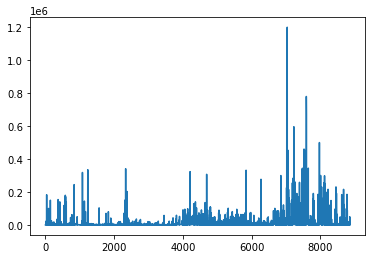

In [100]:
buildings["Square Footage"].plot() 
plt.show()

What can we do with this plot?  What are our options?

Check out: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

While the above was a "quick and dirty" plot, we can do fancier things:

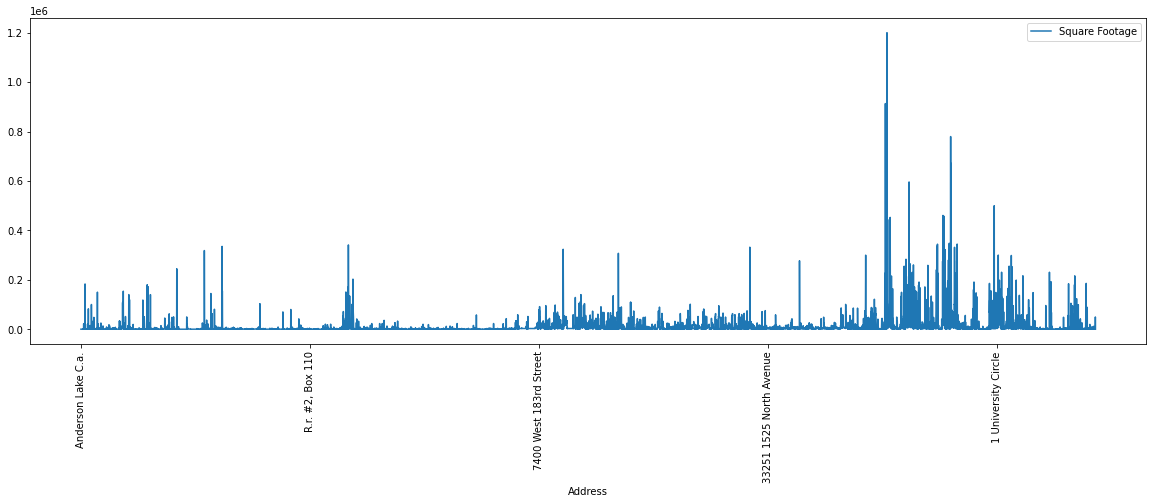

In [101]:
buildings.plot(x = "Address", y="Square Footage", figsize=(20,6), rot=90)

You can also use Pandas to generate the plot and then give you back the matplotlib `ax` objects we've been dealing with before:

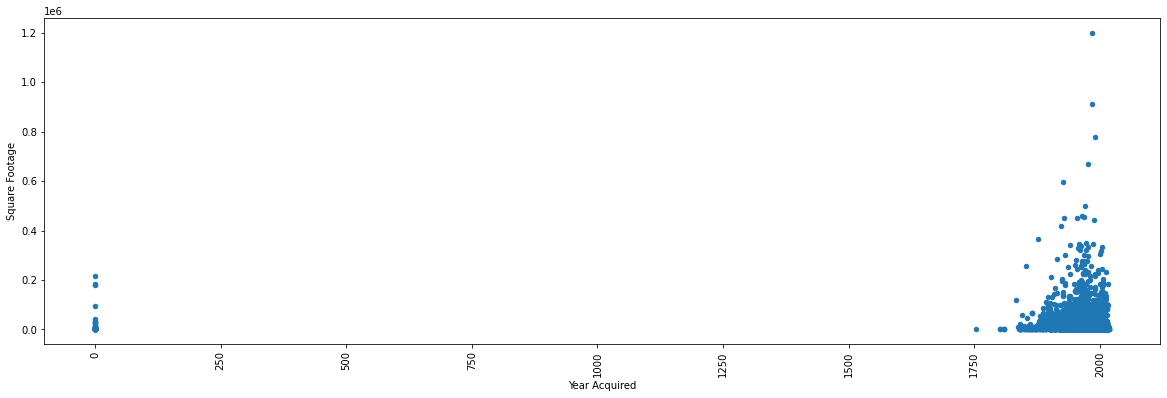

In [102]:
ax = buildings.plot(x = "Year Acquired", y="Square Footage", figsize=(20,6), rot=90, kind='scatter')

(1750.0, 2010.0)

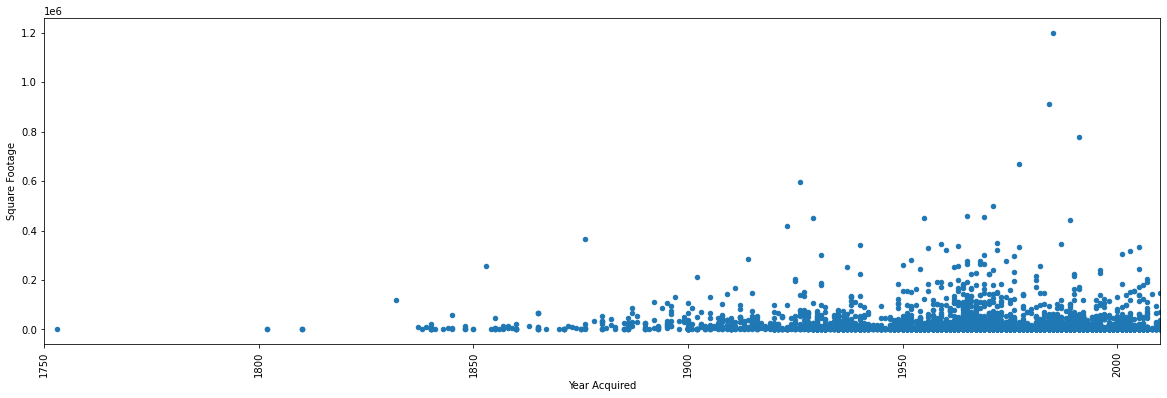

In [103]:
ax = buildings.plot(x = "Year Acquired", y="Square Footage", figsize=(20,6), rot=90, kind='scatter')
ax.set_xlim(1750, 2010)

There are also some useful sorting functions within Pandas.  The `groupby` function can seem a little nebulous, but its a way to sort of "re-index" our datasets.  Here we'll re-group our data by the building's status:

In [104]:
buildings.groupby("Bldg Status") # this doesn't do anything until you call it

Now actually do something with this object, here, just print out - you can see "abandon" is at the top - so i first lists off all of the abandoned buildings.

In [105]:
for grouped in buildings.groupby("Bldg Status"):
    print(grouped)

('Abandon',                                     Agency Name  \
381                Department of Human Services   
449             Department of Natural Resources   
1050            Department of Natural Resources   
1139  Department of Central Management Services   
1172            Department of Natural Resources   
...                                         ...   
8682             Department of Military Affairs   
8683             Department of Military Affairs   
8760               Historic Preservation Agency   
8800             Department of Military Affairs   
8801             Department of Military Affairs   

                                         Location Name  \
381        Lincoln Developmental Center - Logan County   
449       Clinton Lake Recreation Area - DeWitt County   
1050           Jim Edgar Panther Creek F&WA - Cass Co.   
1139                                 Statewide Program   
1172   Saline County Conservation Area - Saline County   
...                        

In [106]:
for status, df in buildings.groupby("Bldg Status"):
    print(status, df.shape[0])

Abandon 226
In Progress 113
In Use 8523


We can also apply NumPy-like functions, for example `max`:

In [107]:
buildings.max()

/Users/jnaiman/opt/anaconda3/envs/DataViz2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Agency Name                   Western Illinois University
Location Name         Zimmerman Property - LaSalle County
City                                                 Zion
Zip code                                            68297
Congress Dist                                          18
Rep Dist                                              119
Senate Dist                                            60
Bldg Status                                        In Use
Year Acquired                                        2019
Year Constructed                                     2019
Square Footage                                    1200000
Total Floors                                           31
Floors Above Grade                                     30
Floors Below Grade                                      4
Usage Description                    Utiility & Miscellan
dtype: object

In [108]:
buildings["Square Footage"].min()

0

There are several differnet options for *how* to read data with Pandas.  For example, we can tell Pandas what to do with empty entries, i.e. ones with a `NaN` tag.

In [109]:
pd.read_csv?

In [111]:
b = pd.read_csv("/Users/jnaiman/Downloads/building_inventory.csv",
           na_values = {'Square Footage': 0,
                       'Year Acquired': 0,
                       'Year Constructed': 0}) 
# specify what to do with incomplete entries, here this just says if any of these columns have a value 0, treat
#  as a NaN or not-a-number

In [112]:
b["Square Footage"].min()

9.0

In [113]:
b["Year Constructed"].min()

1753.0

In [114]:
b["Year Acquired"].min()

1753.0

In [115]:
b.loc[b["Year Acquired"] < 1800]

Agency Name  \
2796  Historic Preservation Agency   

                                          Location Name             Address  \
2796  Fort De Chartres Historic Site - Prairie Du Ro...  1350 State Hwy 155   

                   City  Zip code    County  Congress Dist  \
2796  Prairie Du Rocher     62241  Randolph             12   

     Congressional Full Name  Rep Dist       Rep Full Name  ...  Bldg Status  \
2796               Mike Bost       116  Costello, II Jerry  ...       In Use   

     Year Acquired Year Constructed  Square Footage  Total Floors  \
2796        1753.0           1753.0          1200.0             1   

      Floors Above Grade  Floors Below Grade  Usage Description  \
2796                   1                   0           Assembly   

      Usage Description 2 Usage Description 3  
2796             Assembly        Not provided  

[1 rows x 22 columns]

We can also mutate Pandas dataframes into new data with operations like sorting:

In [116]:
b2 = b.sort_values("Year Constructed")

In [117]:
b2.iloc[0] # this gives the oldest building - the one that was constructed in 1753

Agency Name                                     Historic Preservation Agency
Location Name              Fort De Chartres Historic Site - Prairie Du Ro...
Address                                                   1350 State Hwy 155
City                                                       Prairie Du Rocher
Zip code                                                               62241
County                                                              Randolph
Congress Dist                                                             12
Congressional Full Name                                            Mike Bost
Rep Dist                                                                 116
Rep Full Name                                             Costello, II Jerry
Senate Dist                                                               58
Senator Full Name                                               Paul Schimpf
Bldg Status                                                           In Use

We can build up Pandas commands to get new sorts of aggregated data:

In [118]:
b.groupby("Year Acquired")["Square Footage"].sum()

Year Acquired
1753.0      1200.0
1802.0      4440.0
1810.0      4033.0
1832.0    120000.0
1837.0     10302.0
            ...   
2015.0    305093.0
2016.0    304839.0
2017.0      6720.0
2018.0     17160.0
2019.0      1520.0
Name: Square Footage, Length: 171, dtype: float64

We can then use that to make different plots:

In [119]:
aggregated_data = b.groupby("Year Acquired")["Square Footage"].sum()

In [120]:
aggregated_data.index

Float64Index([1753.0, 1802.0, 1810.0, 1832.0, 1837.0, 1838.0, 1839.0, 1840.0,
              1841.0, 1843.0,
              ...
              2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0,
              2018.0, 2019.0],
             dtype='float64', name='Year Acquired', length=171)

In [121]:
aggregated_data.values

array([1.200000e+03, 4.440000e+03, 4.033000e+03, 1.200000e+05,
       1.030200e+04, 2.010000e+03, 1.175200e+04, 3.691800e+04,
       3.256000e+03, 9.000000e+02, 4.088000e+03, 6.584600e+04,
       2.129200e+04, 2.267000e+03, 2.550000e+05, 2.140000e+03,
       6.615400e+04, 7.500000e+02, 1.812400e+04, 2.236700e+04,
       4.847000e+03, 2.741700e+04, 1.579500e+04, 2.234940e+05,
       2.700000e+03, 2.864000e+03, 6.403000e+03, 1.490000e+04,
       1.100000e+04, 6.600000e+03, 3.808000e+03, 4.042800e+05,
       3.307100e+04, 1.798330e+05, 6.671000e+03, 5.926600e+04,
       8.725000e+03, 3.015700e+04, 1.683700e+05, 1.948230e+05,
       8.492400e+04, 8.633400e+04, 2.325000e+03, 1.514800e+05,
       3.959000e+04, 8.500000e+04, 2.256770e+05, 2.901650e+05,
       1.329070e+05, 3.676000e+04, 1.214750e+05, 3.358350e+05,
       1.094860e+05, 2.697250e+05, 1.605840e+05, 4.096400e+04,
       3.128860e+05, 2.037400e+04, 1.332850e+05, 3.602520e+05,
       2.982830e+05, 2.314110e+05, 2.377220e+05, 4.2281

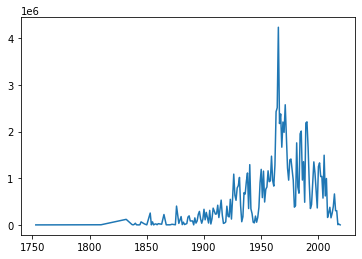

In [122]:
plt.plot(aggregated_data.index, aggregated_data.values)

We can also use pandas plots to do this as well:

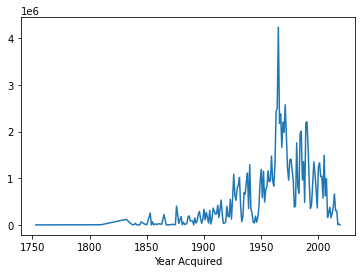

In [123]:
aggregated_data = b.groupby("Year Acquired")["Square Footage"].sum()
aggregated_data.plot()

We can aggregate in a bunch of different ways!

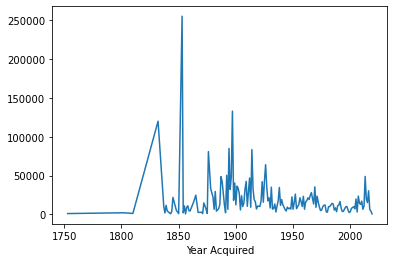

In [124]:
aggregated_data_average = b.groupby("Year Acquired")["Square Footage"].mean()
aggregated_data_average.plot()

Let's go bananas!

In [125]:
b.loc[b["Agency Name"] == "University of Illinois"].groupby("Year Acquired")["Square Footage"].sum()

Year Acquired
1857.0      3000.0
1870.0      2864.0
1878.0     33071.0
1888.0     28746.0
1890.0     27409.0
            ...   
2006.0    180000.0
2008.0    144580.0
2010.0     35000.0
2013.0    230665.0
2015.0      8283.0
Name: Square Footage, Length: 105, dtype: float64

# ASIDE: Python tips and tricks! We won't go through this in lecture but it's here if you want it!

* We've been playing around with a few complex things in Python, but lets take a step back for a moment and delve into how Python deals with data in a bit more detail

In [126]:
# initialize a
a = []

In [127]:
# take a gander at a
a
# hey look a is an empty list!

[]

In [128]:
# we can mix types in our lists
a = [1, 2, "hey"]
# here we have a few integers and a string

In [129]:
# lets look at a again
a

[1, 2, 'hey']

In [130]:
# also, for our general purposes, we can call a string with a single or double quotes
'hey' == "hey"

True

In [131]:
# we can also easily add to our list with the append statement
a.append("there")
a

[1, 2, 'hey', 'there']

In [132]:
# returns an item at an index, & removes item, default is the last item
a.pop()

'there'

In [133]:
# now a is back to what we had before
a

[1, 2, 'hey']

In [134]:
# we can also grab elements of a by their indicies
a[1]

2

In [135]:
# note that indexing starts from 0 in python
a[0]

1

In [136]:
# the -# can be used to grab starting from the last element of the list
a[-1]

'hey'

In [137]:
# the colon means "all the things"
a[:]

[1, 2, 'hey']

In [138]:
# we can also take subsets easily, for example, ignorning the first element of a
# this is a way to filter data
a[1:]

[2, 'hey']

In [139]:
# can also take all but the last eleement
a[:-1]

[1, 2]

In [140]:
# we can also combine these two things to grab from the first to the 2nd to last element
# in this case, the one element
a[1:-1]

[2]

In [141]:
# there are also some nice string manipulations we can do
#  like splitting a string into a list object
a = "this is a much longer list, where i have taken a sentence and split it based on the spaces".split()

In [142]:
a

['this',
 'is',
 'a',
 'much',
 'longer',
 'list,',
 'where',
 'i',
 'have',
 'taken',
 'a',
 'sentence',
 'and',
 'split',
 'it',
 'based',
 'on',
 'the',
 'spaces']

In [143]:
# we can grab every other element in the list
a[::2]

['this', 'a', 'longer', 'where', 'have', 'a', 'and', 'it', 'on', 'spaces']

In [144]:
# we can also reorder this list back-to-front
a[::-1]

['spaces',
 'the',
 'on',
 'based',
 'it',
 'split',
 'and',
 'sentence',
 'a',
 'taken',
 'have',
 'i',
 'where',
 'list,',
 'longer',
 'much',
 'a',
 'is',
 'this']

In [145]:
# we can also update individual strings in this list
a[3] = 'sorta'

In [146]:
a

['this',
 'is',
 'a',
 'sorta',
 'longer',
 'list,',
 'where',
 'i',
 'have',
 'taken',
 'a',
 'sentence',
 'and',
 'split',
 'it',
 'based',
 'on',
 'the',
 'spaces']

In [147]:
# now lets look quickly at some funny things about strings in Python
name = "jill"

In [148]:
name[0]

'j'

In [149]:
# this will produce an error
name[0] = 'J'

TypeError: 'str' object does not support item assignment

In [150]:
# have to use something like replace
name.replace("j","J")

'Jill'

In [151]:
# python also has stuff called dictionaries
d = {'bevier': 'building', 'green' : 'road', 'champaign': 'city'}

In [152]:
d

{'bevier': 'building', 'green': 'road', 'champaign': 'city'}

In [153]:
# here the "champaign" entry is of type "city"
d['champaign']

'city'

In [154]:
# its super easy to add to dictionaries, here we add an empty list
d['mylist'] = []

In [155]:
d

{'bevier': 'building', 'green': 'road', 'champaign': 'city', 'mylist': []}

In [156]:
# we can add to this list in the usual way - with the above "append" function we used before
d['mylist'].append(10)

In [157]:
d

{'bevier': 'building', 'green': 'road', 'champaign': 'city', 'mylist': [10]}

In [158]:
# there are these other cool objects called "sets"
myset = set()

In [159]:
myset

set()

In [160]:
# lets check out some operations with sets, for example some movies I like
jill_movies = set(['last jedi', 'girls trip', 'frozen'])
# lets say we have another person named bob an these are the movies he likes
bob_movies = set(['last jedi', 'other movie'])

In [161]:
jill_movies

{'frozen', 'girls trip', 'last jedi'}

In [162]:
bob_movies

{'last jedi', 'other movie'}

In [163]:
# we can create a set that is made up of my movies, but without those movies that appear in bob's movies list
jill_movies - bob_movies

{'frozen', 'girls trip'}

In [164]:
jill_movies[0] # note we can't index

TypeError: 'set' object is not subscriptable

In [165]:
# we can take the union of sets
jill_movies.union(bob_movies)

{'frozen', 'girls trip', 'last jedi', 'other movie'}

In [166]:
# for some final string manipulation, we can use a thing called enumerate 
# to both count in a for loop and use an element of our list directly
for i, word in enumerate(reversed(a)):
    print(i, word.upper())

0 SPACES
1 THE
2 ON
3 BASED
4 IT
5 SPLIT
6 AND
7 SENTENCE
8 A
9 TAKEN
10 HAVE
11 I
12 WHERE
13 LIST,
14 LONGER
15 SORTA
16 A
17 IS
18 THIS


In [167]:
# continue and break are flow control statements
for i, word in enumerate(sorted(a)):
    if word == "and":
        continue
    if word == "it":
        break
    print(i, word.upper())

0 A
1 A
3 BASED
4 HAVE
5 I
6 IS


In [168]:
# also, we can use the "?" to figure out things we don't know, for example the reader
#  function from  the csv library
import csv

In [169]:
csv.reader?